In [6]:
# To start our notebook we want to import modules that we will use to analyze and plot our data.
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import pysal as ps
from pysal.contrib.viz import mapping as maps
import palettable as pltt
from seaborn import palplot
from shapely.geometry import Point

In [3]:
# Check to make sure where I am in file structure
pwd

'/Users/dannytobin/code4policy/climate4policy/final_analysis'

In [4]:
# check to make sure data is here
ls

Cali_maps.ipynb           output/
getprism.sh*              prism_climate_indicators/


In [20]:
# Make a link to the file directory (which I didn't use) and load in shapefile of california
prism_dir = 'prism_climate_indicators/'
cal_counties = gpd.read_file('prism_climate_indicators/CA_counties_shp/CA_Counties_TIGER2016.shp')

In [8]:
# Make sure shapefile looks okay by showing first 5 lines
cal_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,,,,A,2468694587,23299110,+39.5769252,-120.5219926,POLYGON ((-13431319.75097945 4821511.426395644...
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,,42200,,A,7084000598,2729814515,+34.5370572,-120.0399729,(POLYGON ((-13423116.77225655 4042044.14856006...
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,,,,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,,A,4773390489,945942791,+34.3587415,-119.1331432,(POLYGON ((-13317853.59433417 3931602.41399276...


In [21]:
# Rename a couple of columns
cal_counties.rename(columns = {'INTPTLAT' :'latitude'}, inplace = True)
cal_counties.rename(columns = {'INTPTLON' :'longitude'}, inplace = True)

cal_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,latitude,longitude,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,,,,A,2468694587,23299110,+39.5769252,-120.5219926,POLYGON ((-13431319.75097945 4821511.426395644...
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,,A,2499183617,76073827,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,,42200,,A,7084000598,2729814515,+34.5370572,-120.0399729,(POLYGON ((-13423116.77225655 4042044.14856006...
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,,,,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,,A,4773390489,945942791,+34.3587415,-119.1331432,(POLYGON ((-13317853.59433417 3931602.41399276...


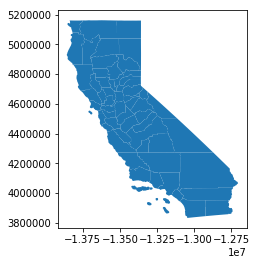

In [10]:
# Do a test plot
cal_counties.plot()

In [19]:
# Load in clean csv from stata with pandas
calclimate = 'output/calcounties_all.csv'
cal_indicators = pd.read_csv(calclimate)

#showing the first 10 rows
cal_indicators.head(10)

,idnum,id,latitude,longitude,county,maxtemp_coeff,meantemp_coeff,precip_change
0,1,37.6464_-121.8861,37.6464,-121.8861,Alameda,-0.000187,0.005605,-0.007452
1,2,38.5973_-119.8207,38.5973,-119.8207,Alpine,0.079270,0.129379,-0.021833
2,3,38.4461_-120.6520,38.4461,-120.6520,Amador,-0.012297,0.025934,0.000149
3,4,39.6670_-121.6006,39.6670,-121.6006,Butte,0.032539,0.051617,-0.009674
4,5,38.2047_-120.5541,38.2047,-120.5541,Calaveras,0.017638,0.048799,-0.006349
5,6,39.1776_-122.2370,39.1776,-122.2370,Colusa,0.043928,0.040569,-0.008936
6,7,37.9192_-121.9263,37.9192,-121.9263,Contra Costa,-0.034007,-0.003530,-0.002143
7,8,41.7431_-123.8968,41.7431,-123.8968,Del Norte,-0.009894,0.020074,-0.000218
8,9,38.7786_-120.5248,38.7786,-120.5248,El Dorado,0.022704,0.050351,-0.005403
9,10,36.7584_-119.6504,36.7584,-119.6504,Fresno,0.063499,0.049219,-0.005218


In [12]:
# check to see data is right size (we expect 58 rows - 1 per county)
cal_indicators.shape

(58, 8)

In [22]:
# Make sure columns are named the same to allow for merge of datasets
cal_counties.rename(columns = {'NAME' :'COUNTY'}, inplace = True)
cal_indicators.rename(columns = {'county' :'COUNTY'}, inplace = True)


In [15]:
# To merge on location I would need to set index - to merge on column I should not
#cal_indicators = cal_indicators.set_index('COUNTY')
#cal_counties = cal_counties.set_index('COUNTY')

In [23]:
# Merge the shapefile and temperature data based on the county column
county_temps = cal_counties.merge(cal_indicators, on="COUNTY")
# check to make sure it worked
county_temps.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,COUNTY,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,latitude_x,longitude_x,geometry,idnum,id,latitude_y,longitude_y,maxtemp_coeff,meantemp_coeff,precip_change
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,,...,+39.5769252,-120.5219926,POLYGON ((-13431319.75097945 4821511.426395644...,46,39.5804_-120.5161,39.5804,-120.5161,0.043961,0.086002,-0.016183
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,+38.4500114,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...,34,38.4493_-121.3438,38.4493,-121.3438,0.026809,0.017364,-0.010149
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,,...,+34.5370572,-120.0399729,(POLYGON ((-13423116.77225655 4042044.14856006...,42,34.6730_-120.0167,34.6730,-120.0167,0.048590,0.019093,-0.016518
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,,...,+38.1838996,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ...",5,38.2047_-120.5541,38.2047,-120.5541,0.017638,0.048799,-0.006349
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,...,+34.3587415,-119.1331432,(POLYGON ((-13317853.59433417 3931602.41399276...,56,34.4566_-119.0836,34.4566,-119.0836,0.032605,0.009952,-0.021105


In [99]:
# Make sure I have all 58 counties after merge
county_temps.shape

(58, 25)

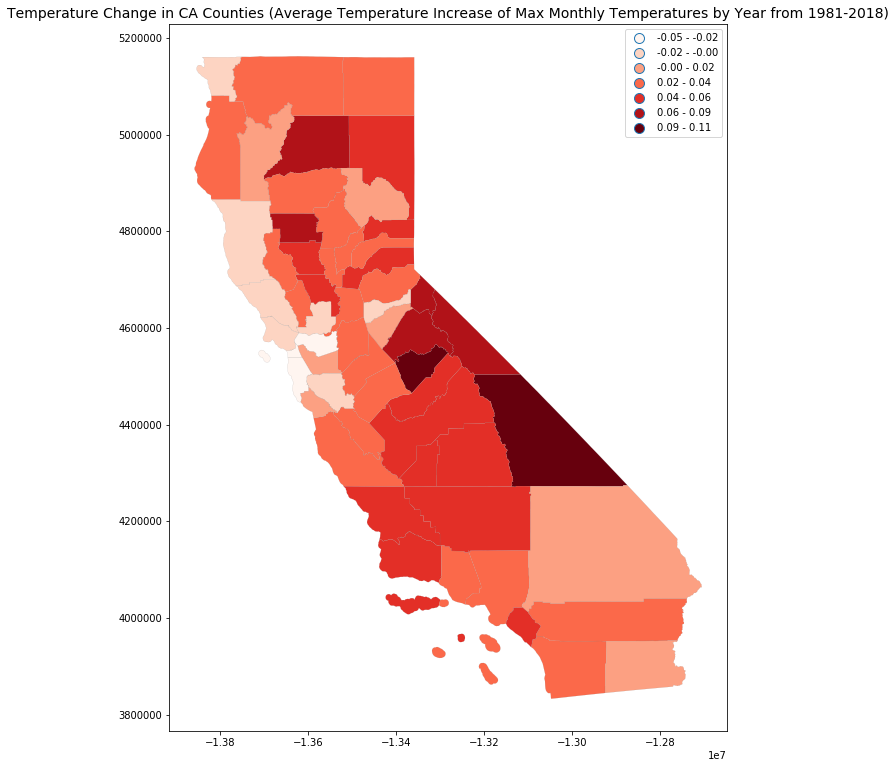

In [24]:
# Show max monthly temperature change by county 
fig, ax = plt.subplots(1, figsize = (10,13))
county_temps.plot(column='maxtemp_coeff', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Reds, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("Temperature Change in CA Counties (Average Temperature Increase of Max Monthly Temperatures by Year from 1981-2018)", size=14)
# I saved the image into the working directory to send around
plt.savefig('ca_tempmapwithlegend.png')



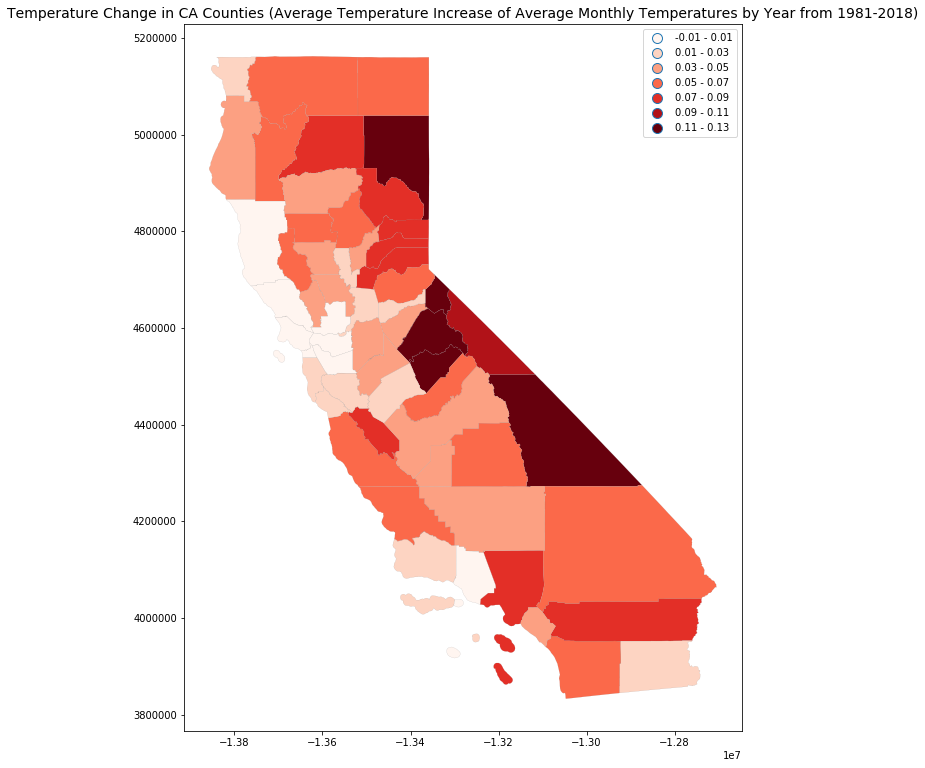

In [25]:
# Show Temperature change by county (mean temperature per month change)
# I changed the legend to the top right and created my final map
fig, ax = plt.subplots(1, figsize = (10,13))
county_temps.plot(column='meantemp_coeff', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Reds, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("Temperature Change in CA Counties (Average Temperature Increase of Average Monthly Temperatures by Year from 1981-2018)", size=14)
# I saved the image into the working directory to send around
plt.savefig('ca_meantempmapwithlegend.png')


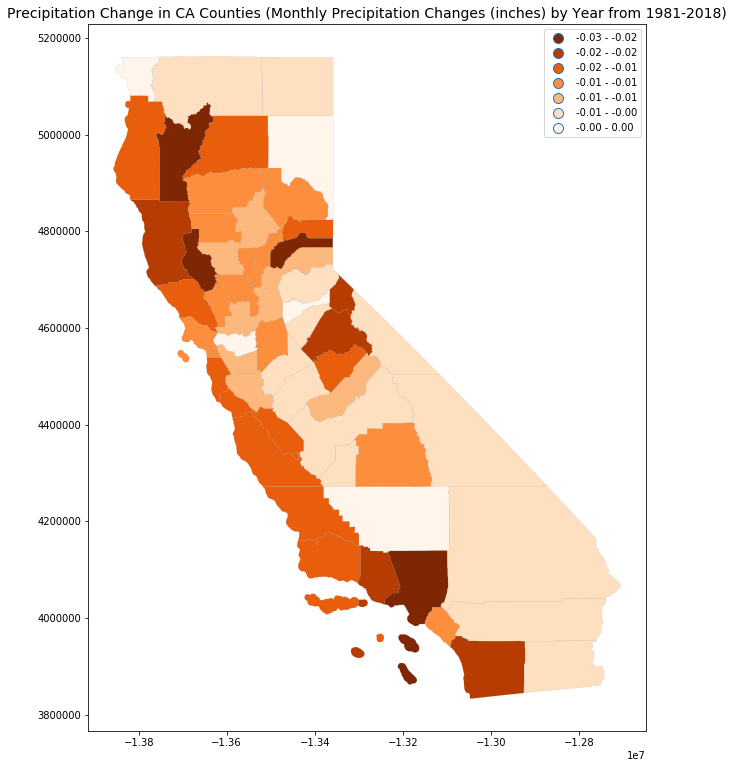

In [28]:
#Show precipitation change by county
# I changed the legend to the top right and created my final map
fig, ax = plt.subplots(1, figsize = (10,13))
county_temps.plot(column='precip_change', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Oranges_r, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("Precipitation Change in CA Counties (Monthly Precipitation Changes (inches) by Year from 1981-2018)", size=14)
# I saved the image into the working directory to send around
plt.savefig('ca_meantempmapwithlegend.png')


In [30]:
# Create the same plots but with total change over the time period rather than yearly change
# First create columns
# Test on one indicator
county_temps["total_precip_change"] = county_temps["precip_change"] * 37
county_temps.head()


,STATEFP,COUNTYFP,COUNTYNS,GEOID,COUNTY,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,longitude_x,geometry,idnum,id,latitude_y,longitude_y,maxtemp_coeff,meantemp_coeff,precip_change,total_precip_change
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,,...,-120.5219926,POLYGON ((-13431319.75097945 4821511.426395644...,46,39.5804_-120.5161,39.5804,-120.5161,0.043961,0.086002,-0.016183,-0.598774
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,...,-121.3404409,POLYGON ((-13490651.47641084 4680831.603393857...,34,38.4493_-121.3438,38.4493,-121.3438,0.026809,0.017364,-0.010149,-0.375528
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,,...,-120.0399729,(POLYGON ((-13423116.77225655 4042044.14856006...,42,34.6730_-120.0167,34.6730,-120.0167,0.048590,0.019093,-0.016518,-0.611153
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,,...,-120.5614415,"POLYGON ((-13428575.483353 4627725.227535474, ...",5,38.2047_-120.5541,38.2047,-120.5541,0.017638,0.048799,-0.006349,-0.234924
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,...,-119.1331432,(POLYGON ((-13317853.59433417 3931602.41399276...,56,34.4566_-119.0836,34.4566,-119.0836,0.032605,0.009952,-0.021105,-0.780871


In [31]:
# Do for other indicators
county_temps["total_maxtemp_change"] = county_temps["maxtemp_coeff"] * 37
county_temps["total_meantemp_change"] = county_temps["meantemp_coeff"] * 37

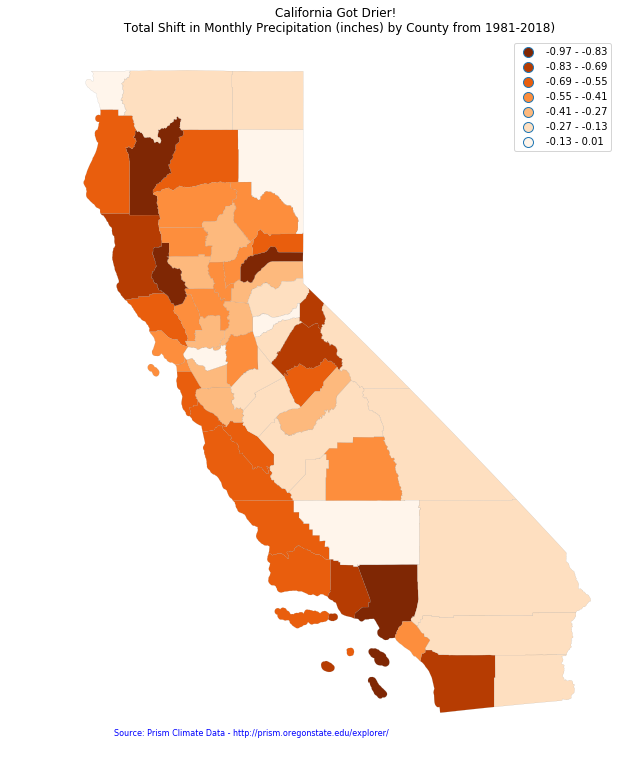

<Figure size 432x288 with 0 Axes>

In [50]:
#Show precipitation change by county
# I changed the legend to the top right and created my final map
fig, ax = plt.subplots(1, figsize = (10,13))
county_temps.plot(column='total_precip_change', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Oranges_r, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("California Got Drier! \n Total Shift in Monthly Precipitation (inches) by County from 1981-2018)", size=12)
#fig.subtitle("Total Shift in Monthly Precipitation (inches) by County from 1981-2018)")

# I could label axis
#plt.xlabel('longitude')
#plt.ylabel('latitude')
# But I decided to turn them off for a map
ax.set_axis_off()
ax.text(0.10, 0.01,'Source: Prism Climate Data - http://prism.oregonstate.edu/explorer/',verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes, color = "blue", fontsize=8)


plt.show()

#annotate source
# I saved the image into the working directory to send around
plt.savefig('output/ca_precip.png')

In [59]:
import matplotlib.colors

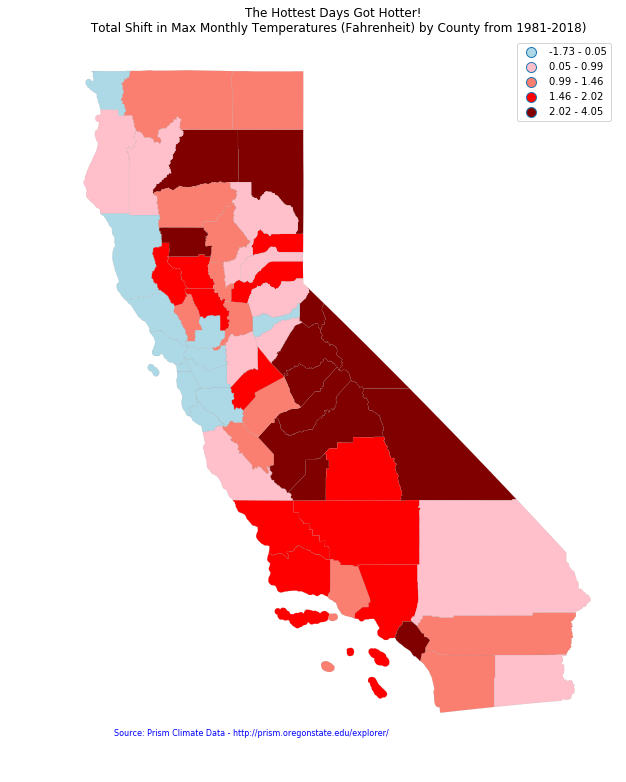

<Figure size 432x288 with 0 Axes>

In [67]:
#Show precipitation change by county
# I changed the legend to the top right and created my final map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["lightblue","pink","salmon", "red", "maroon"])

fig, ax = plt.subplots(1, figsize = (10,13))
county_temps.plot(column='total_maxtemp_change', legend = True, scheme='quantiles', k=5, 
         cmap=cmap, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("The Hottest Days Got Hotter!  \n Total Shift in Max Monthly Temperatures (Fahrenheit) by County from 1981-2018)", size=12)
#fig.subtitle("Total Shift in Monthly Precipitation (inches) by County from 1981-2018)")

# I could label axis
#plt.xlabel('longitude')
#plt.ylabel('latitude')
# But I decided to turn them off for a map
ax.set_axis_off()
ax.text(0.10, 0.01,'Source: Prism Climate Data - http://prism.oregonstate.edu/explorer/',verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes, color = "blue", fontsize=8)


plt.show()

#annotate source
# I saved the image into the working directory to send around
plt.savefig('output/ca_maxtemp.png')

In [68]:
# Load in clean csv from stata with pandas
cyr = 'output/prism_countyyear_panel.csv'
county_year = pd.read_csv(cyr)

In [ ]:
ax = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full-time vs. Median')

In [ ]:
calcounties_all.csv 

In [10]:
#Reading in the newly created file
#assigning the csv to a variable
tempbycounty ='prism_climate_indicators/maxtempbycounty.csv'

#reading the csv
cal_temps = pd.read_csv(tempbycounty)

#showing the first 10 rows
cal_temps.head(10)

,id,longitude,latitude,idnum,mean_coeff
0,33.0360_-116.7329,33.0360,-116.7329,1,0.011094
1,33.0396_-115.3653,33.0396,-115.3653,2,0.004231
2,33.7437_-115.9938,33.7437,-115.9938,3,0.005287
3,34.6730_-120.0167,34.6730,-120.0167,4,0.009353
4,34.8415_-116.1784,34.8415,-116.1784,5,0.001002
5,35.3429_-118.7298,35.3429,-118.7298,6,0.009961
6,35.3871_-120.4040,35.3871,-120.4040,7,0.003994
7,36.0753_-119.8155,36.0753,-119.8155,8,0.010705
8,36.5111_-117.4108,36.5111,-117.4108,9,0.015198
9,36.6057_-121.0750,36.6057,-121.0750,10,0.006494


In [42]:
tempbycounty2 ='prism_climate_indicators/maxtempbycounty_test.csv'
cal_temps2 = pd.read_csv(tempbycounty)
cal_temps2['Coordinates'] = list(zip(cal_temps2.longitude, cal_temps2.latitude))
cal_temps2['Coordinates'] = cal_temps2['Coordinates'].apply(Point)
gdf2 = gpd.GeoDataFrame(cal_temps2, geometry='Coordinates')

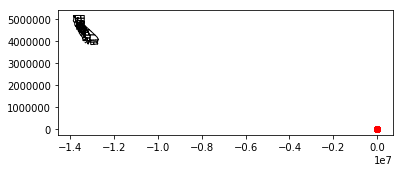

In [43]:
# We restrict to South America.
ax = cal_counties.plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf2.plot(ax=ax, color='red')

plt.show()

In [46]:
for index, row in cal_counties.iterrows():
     for pt in list(row['geometry'].exterior.coords): 
        print(Point(pt))

POINT (-13431319.75097945 4821511.426395644)
POINT (-13431312.96049028 4821519.672596325)
POINT (-13431300.15875014 4821552.223453529)
POINT (-13431282.68158825 4821561.482384839)
POINT (-13431242.0499681 4821566.111857021)
POINT (-13431224.57280789 4821591.7186423)
POINT (-13431222.12378146 4821618.482864941)
POINT (-13431249.61971054 4821720.187561357)
POINT (-13431258.52527976 4821803.085613538)
POINT (-13431242.16131572 4821839.254265891)
POINT (-13431211.77109588 4821897.558409709)
POINT (-13431223.23700899 4821933.727401362)
POINT (-13431195.96374272 4822063.213472593)
POINT (-13431231.69731207 4822132.225165552)
POINT (-13431299.15695952 4822377.603942877)
POINT (-13431301.2720357 4822431.28135554)
POINT (-13431277.67230842 4822514.185314695)
POINT (-13431246.16889242 4822561.931364563)
POINT (-13431193.73741191 4822639.91707045)
POINT (-13431185.38845273 4822678.403745361)
POINT (-13431205.98256904 4822748.577196158)
POINT (-13431203.64486188 4822773.029505142)
POINT (-13431155

POINT (-13422438.12144404 4796652.008509749)
POINT (-13422435.56109553 4796653.884554255)
POINT (-13422435.56109627 4796661.100112335)
POINT (-13422444.0213802 4796673.655194916)
POINT (-13422455.93256825 4796679.860585566)
POINT (-13422461.94382233 4796685.921669097)
POINT (-13422470.29278596 4796690.683951213)
POINT (-13422473.74369125 4796695.879171227)
POINT (-13422474.52292868 4796704.393565909)
POINT (-13422472.07390021 4796711.464848663)
POINT (-13422465.28341104 4796719.834945298)
POINT (-13422444.02138603 4796730.946982203)
POINT (-13422433.00075491 4796733.255979106)
POINT (-13422423.64991603 4796731.668545415)
POINT (-13422405.83879414 4796726.617620475)
POINT (-13422382.90697439 4796716.948712979)
POINT (-13422367.54488129 4796708.001373453)
POINT (-13422331.92263746 4796697.322303019)
POINT (-13422312.33040317 4796689.673785988)
POINT (-13422299.63997901 4796687.942047938)
POINT (-13422294.51928173 4796689.096541332)
POINT (-13422289.50990449 4796695.44625499)
POINT (-1342

POINT (-13437265.65690062 4792290.287660815)
POINT (-13437271.5568336 4792280.767275969)
POINT (-13437282.6887823 4792259.56281514)
POINT (-13437286.91892198 4792243.407065989)
POINT (-13437290.36982615 4792237.637161681)
POINT (-13437312.41108659 4792215.423060206)
POINT (-13437329.44297045 4792206.191239495)
POINT (-13437348.03332781 4792200.7098491)
POINT (-13437359.944515 4792198.546142719)
POINT (-13437408.36850113 4792197.82490281)
POINT (-13437421.17024483 4792199.988606499)
POINT (-13437432.97011304 4792203.01779308)
POINT (-13437458.46228069 4792204.893002415)
POINT (-13437471.15270455 4792203.883271563)
POINT (-13437500.87501287 4792199.411610289)
POINT (-13437529.81808384 4792187.150619181)
POINT (-13437547.6292042 4792177.341837639)
POINT (-13437591.82304715 4792158.301288094)
POINT (-13437608.74361156 4792149.646505126)
POINT (-13437618.0944497 4792144.020900366)
POINT (-13437630.00563575 4792130.606010513)
POINT (-13437636.01688811 4792119.787564389)
POINT (-13437644.4771

POINT (-13447169.64151781 4785064.894539718)
POINT (-13447173.87165626 4785036.498115952)
POINT (-13447190.01297744 4784962.120046057)
POINT (-13447198.58457534 4784920.174517127)
POINT (-13447198.47325294 4784891.634361122)
POINT (-13447205.26374074 4784869.724800752)
POINT (-13447218.06548233 4784851.130539599)
POINT (-13447234.98604476 4784823.023001144)
POINT (-13447257.91785889 4784777.474542264)
POINT (-13447278.28932359 4784724.719307638)
POINT (-13447293.65141118 4784679.60371234)
POINT (-13447310.68329148 4784635.209011147)
POINT (-13447325.93406108 4784605.084146751)
POINT (-13447343.7451809 4784589.949678576)
POINT (-13447368.3467907 4784574.382820179)
POINT (-13447395.50874937 4784560.689769683)
POINT (-13447415.88021876 4784554.203593619)
POINT (-13447424.45182065 4784551.609124322)
POINT (-13447472.87580565 4784539.934019786)
POINT (-13447496.58686028 4784533.303719932)
POINT (-13447522.96958378 4784533.30371724)
POINT (-13447555.25224217 4784542.528476771)
POINT (-134475

POINT (-13463923.78380477 4781834.990301402)
POINT (-13463947.60617998 4781839.025047432)
POINT (-13463973.98890292 4781833.693413187)
POINT (-13463997.699958 4781831.676037403)
POINT (-13464042.1164428 4781841.186510839)
POINT (-13464079.51979895 4781854.299453531)
POINT (-13464107.57231526 4781856.316828571)
POINT (-13464166.2376963 4781857.613708595)
POINT (-13464183.26958072 4781854.011246125)
POINT (-13464196.96187977 4781849.255998545)
POINT (-13464209.76362194 4781836.575351757)
POINT (-13464227.46342165 4781815.537041628)
POINT (-13464241.04439898 4781789.023070593)
POINT (-13464250.50655478 4781765.247015058)
POINT (-13464259.85739035 4781734.266178961)
POINT (-13464270.09878204 4781703.861823307)
POINT (-13464281.11940951 4781665.820484411)
POINT (-13464291.36080094 4781632.822621454)
POINT (-13464318.63407483 4781576.91382495)
POINT (-13464334.77540174 4781559.190224271)
POINT (-13464351.47332675 4781546.798131251)
POINT (-13464352.92048027 4781545.933567165)
POINT (-1346437

POINT (-13467214.39187787 4815200.302217579)
POINT (-13467191.34874126 4815216.061317082)
POINT (-13467151.49635991 4815241.796413958)
POINT (-13467092.05174532 4815269.844855086)
POINT (-13467056.31818464 4815284.592005647)
POINT (-13467024.03552847 4815296.881314671)
POINT (-13466990.08308008 4815313.074308733)
POINT (-13466949.3401432 4815344.014564266)
POINT (-13466930.63846836 4815369.02708237)
POINT (-13466919.61784042 4815401.99165128)
POINT (-13466914.49714625 4815433.221342618)
POINT (-13466914.49714933 4815463.149887868)
POINT (-13466912.82736112 4815506.091000801)
POINT (-13466930.63849127 4815591.829193502)
POINT (-13466931.52905063 4815623.782401763)
POINT (-13466930.63849529 4815630.867063699)
POINT (-13466920.50842229 4815652.844006899)
POINT (-13466893.34646446 4815674.387243329)
POINT (-13466865.29395008 4815691.303777665)
POINT (-13466838.02067301 4815715.449648453)
POINT (-13466816.75864981 4815743.644001445)
POINT (-13466782.02696592 4815770.103391198)
POINT (-13466

POINT (-13431709.81445192 4820680.18646713)
POINT (-13431710.59369228 4820717.074344201)
POINT (-13431695.12028727 4820782.026272405)
POINT (-13431673.52430576 4820812.694146263)
POINT (-13431566.32363901 4821006.974418761)
POINT (-13431539.82960267 4821072.072897242)
POINT (-13431450.32873694 4821258.256889382)
POINT (-13431408.02734131 4821429.543436915)
POINT (-13431406.13491032 4821435.908872021)
POINT (-13431382.86913552 4821460.068630219)
POINT (-13431345.46578258 4821478.87567008)
POINT (-13431334.33383321 4821493.342646092)
POINT (-13431319.75097945 4821511.426395644)
POINT (-13490651.47641084 4680831.603393857)
POINT (-13490511.10250957 4680816.623367125)
POINT (-13490464.68227419 4680811.772696614)
POINT (-13490437.96559195 4680808.919362038)
POINT (-13490301.2652345 4680794.510034805)
POINT (-13490240.03950437 4680787.947377565)
POINT (-13490090.2034448 4680771.968751582)
POINT (-13489970.98025032 4680759.414134593)
POINT (-13489949.94086306 4680757.274144671)
POINT (-134899

POINT (-13474443.23899779 4621199.546794543)
POINT (-13474453.48039153 4621188.767024981)
POINT (-13474463.72178554 4621180.824043856)
POINT (-13474477.41408437 4621173.590262387)
POINT (-13474488.32339569 4621168.342227941)
POINT (-13474501.57041592 4621155.151235607)
POINT (-13474512.59104601 4621142.102098737)
POINT (-13474518.37965909 4621127.776435517)
POINT (-13474521.16264531 4621112.032413139)
POINT (-13474520.49472741 4621102.954789777)
POINT (-13474517.60041925 4621093.026148596)
POINT (-13474507.47034167 4621068.204587826)
POINT (-13474503.57415764 4621055.013725462)
POINT (-13474504.46471229 4621039.978999219)
POINT (-13474509.0288105 4621022.674907188)
POINT (-13474516.26457697 4621006.080026312)
POINT (-13474529.51159715 4620992.321896805)
POINT (-13474534.40965518 4620988.775989983)
POINT (-13474541.86806206 4620986.93211845)
POINT (-13474567.24890993 4620986.932116036)
POINT (-13474577.37898509 4620985.939261691)
POINT (-13474582.61100187 4620984.804571728)
POINT (-1347

POINT (-13488866.23922678 4615563.975443593)
POINT (-13488881.60131821 4615556.603845527)
POINT (-13488926.90835665 4615541.860663828)
POINT (-13488941.82517057 4615540.017766721)
POINT (-13488968.98713026 4615536.899018341)
POINT (-13488970.32296436 4615536.899018215)
POINT (-13489006.50180443 4615536.048447912)
POINT (-13489027.76383043 4615535.48140135)
POINT (-13489057.82009792 4615538.458382704)
POINT (-13489080.41795866 4615544.695874056)
POINT (-13489092.10650732 4615547.956382415)
POINT (-13489105.24220924 4615547.531097268)
POINT (-13489135.96639341 4615546.680526604)
POINT (-13489170.14148246 4615547.247568527)
POINT (-13489217.00699663 4615560.289611377)
POINT (-13489252.18396163 4615564.825976186)
POINT (-13489291.14578893 4615559.013751166)
POINT (-13489316.74927506 4615551.075110273)
POINT (-13489352.92811484 4615547.105789901)
POINT (-13489424.39523901 4615546.396976692)
POINT (-13489464.47026138 4615540.443000764)
POINT (-13489520.46397357 4615536.048399184)
POINT (-134

POINT (-13518724.02373234 4615636.271241737)
POINT (-13518733.26325171 4615638.539441412)
POINT (-13518776.56654169 4615652.999227555)
POINT (-13518797.93988766 4615657.535634494)
POINT (-13518841.24317707 4615666.041402585)
POINT (-13518902.46890738 4615675.681280422)
POINT (-13518926.17996305 4615680.642986507)
POINT (-13518938.42510922 4615683.620011494)
POINT (-13518980.61520414 4615698.363387767)
POINT (-13519055.86719557 4615741.034244386)
POINT (-13519104.40250311 4615762.865912844)
POINT (-13519145.47940262 4615774.065291658)
POINT (-13519187.66949616 4615774.065287653)
POINT (-13519201.6957532 4615763.858253485)
POINT (-13519204.0334626 4615761.022968158)
POINT (-13519206.92776952 4615757.904155166)
POINT (-13519234.4236852 4615728.275478878)
POINT (-13519243.66320307 4615714.524400028)
POINT (-13519263.14411493 4615692.834590859)
POINT (-13519276.83641285 4615676.248297132)
POINT (-13519310.12094326 4615649.880396885)
POINT (-13519349.08276804 4615617.700309154)
POINT (-13519

POINT (-13534227.60078349 4592772.655411419)
POINT (-13534295.95095799 4592736.586028873)
POINT (-13534368.0859962 4592705.184550058)
POINT (-13534475.62065341 4592839.985226903)
POINT (-13534813.25274038 4593048.767063278)
POINT (-13535000.26951775 4593092.475978691)
POINT (-13535126.17188294 4593111.147800392)
POINT (-13535166.35822622 4593121.049540208)
POINT (-13535285.91538047 4593150.613362695)
POINT (-13535498.53564535 4593201.819800214)
POINT (-13535712.82570158 4593239.305331042)
POINT (-13536183.59591155 4593357.562481817)
POINT (-13536999.56792203 4593545.560180647)
POINT (-13537971.387223 4593513.307406224)
POINT (-13539352.97362005 4593347.801670274)
POINT (-13539499.02481282 4593330.826872419)
POINT (-13539563.25616543 4593293.906807166)
POINT (-13539607.7839662 4593268.303314437)
POINT (-13539679.13976209 4593175.367420862)
POINT (-13539743.70506017 4592998.551063381)
POINT (-13539801.36854674 4592799.954538107)
POINT (-13539893.09579237 4592490.326967987)
POINT (-135399

POINT (-13536533.69815302 4618821.457010863)
POINT (-13536532.80759744 4618826.562041566)
POINT (-13536533.36419588 4618836.063077455)
POINT (-13536534.25475335 4618850.9527782)
POINT (-13536536.59246576 4618880.023208327)
POINT (-13536536.81510501 4618882.575737818)
POINT (-13536538.15094068 4618899.167194944)
POINT (-13536543.49428392 4618971.914668771)
POINT (-13536566.64875228 4619085.362046137)
POINT (-13536584.45988126 4619167.044931796)
POINT (-13536612.95768235 4619241.921478473)
POINT (-13536648.57993089 4619305.453519803)
POINT (-13536687.87572318 4619368.985952848)
POINT (-13536732.40353149 4619423.442635051)
POINT (-13536738.08082697 4619429.540666814)
POINT (-13536786.39349833 4619481.728621273)
POINT (-13536849.06638856 4619558.734701128)
POINT (-13536855.30028173 4619566.392795806)
POINT (-13536910.51476362 4619629.501385175)
POINT (-13536916.19205948 4619639.712249789)
POINT (-13536926.9900528 4619650.77403077)
POINT (-13536952.37090447 4619691.759452499)
POINT (-135369

POINT (-13527083.23249392 4660465.078251859)
POINT (-13527080.00422851 4660468.495443734)
POINT (-13526992.39578477 4660562.468667585)
POINT (-13526858.47843052 4660706.562620814)
POINT (-13526791.57541314 4660778.467971263)
POINT (-13526720.2196159 4660855.215031661)
POINT (-13526710.53481972 4660865.751778775)
POINT (-13526629.49422629 4660952.893941327)
POINT (-13526627.37915585 4660955.172177754)
POINT (-13526624.93012691 4660957.592804537)
POINT (-13526618.25095713 4660964.854688258)
POINT (-13526611.57178734 4660971.97418712)
POINT (-13526607.1190075 4660976.95783924)
POINT (-13526606.22845158 4660978.524130364)
POINT (-13526604.0020619 4660983.507785466)
POINT (-13526603.22282551 4660985.216467774)
POINT (-13526593.98330825 4661005.008725355)
POINT (-13526584.63247149 4661024.801021246)
POINT (-13526534.31606418 4661131.879429941)
POINT (-13526431.01158196 4661352.162606847)
POINT (-13526327.70709975 4661572.450527985)
POINT (-13526314.46008104 4661600.930243565)
POINT (-1352628

AttributeError: 'MultiPolygon' object has no attribute 'exterior'

In [52]:
cal_temps2.dtypes

id              object
longitude      float64
latitude       float64
idnum            int64
mean_coeff     float64
Coordinates     object
dtype: object

In [57]:
gdf2.dtypes

id              object
longitude      float64
latitude       float64
idnum            int64
mean_coeff     float64
Coordinates     object
dtype: object

In [ ]:
39_2690_n121_3512 38_6867_n121_9017 34_4566_n119_0836 38_0272_n119_9553 36_2201_n118_8005 40_6507_n123_1126 40_1257_n122_2339 39_0347_n121_6948 37_5591_n120_9976 38_5284_n122_8871 38_2700_n121_9326 41_5927_n122_5403 39_5804_n120_5161 39_0636_n120_7175 33_7029_n117_7610 39_3014_n120_7682 38_5064_n122_3305 36_2172_n121_2390 37_9390_n118_8866 41_5898_n120_7250 37_1922_n120_7182 39_4403_n123_3912 37_5816_n119_9051 38_0724_n122_7183 37_2181_n119_7626 34_3231_n118_2249 40_6736_n120_5943 38_4461_n120_6520 38_5973_n119_8207 37_6464_n121_8861

In [67]:
counties = ["Alameda", "Alpine", "Amador", "Butte", "Calaveras", "Colusa", "Contra Costa", "Del Norte", "El Dorado", "Fresno", "Glenn", "Humboldt", "Imperial", "Inyo", "Kern", "Kings", "Lake", "Lassen", "Los Angeles", "Madera", "Marin", "Mariposa", "Mendocino", "Merced", "Modoc",  "Mono", "Monterey", "Napa", "Nevada", "Orange", "Placer", "Plumas", "Riverside", "Sacramento", "San Benito", "San Bernardino", "San Diego", "San Francisco", "San Joaquin", "San Luis Obispo", "San Mateo", "Santa Barbara", "Santa Clara", "Santa Cruz", "Shasta", "Sierra", "Siskiyou", "Solano", "Sonoma", "Stanislaus", "Sutter", "Tehama", "Trinity", "Tulare", "Tuolumne", "Ventura", "Yolo", "Yuba"]


In [70]:
numbers = list(range(1,59))
numbers

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58]

In [73]:
for count, num in zip(counties, numbers): 
    print ("replace county = \"%s\" if idnum == %d" %(count, num)) 


replace county = "Alameda" if idnum == 1
replace county = "Alpine" if idnum == 2
replace county = "Amador" if idnum == 3
replace county = "Butte" if idnum == 4
replace county = "Calaveras" if idnum == 5
replace county = "Colusa" if idnum == 6
replace county = "Contra Costa" if idnum == 7
replace county = "Del Norte" if idnum == 8
replace county = "El Dorado" if idnum == 9
replace county = "Fresno" if idnum == 10
replace county = "Glenn" if idnum == 11
replace county = "Humboldt" if idnum == 12
replace county = "Imperial" if idnum == 13
replace county = "Inyo" if idnum == 14
replace county = "Kern" if idnum == 15
replace county = "Kings" if idnum == 16
replace county = "Lake" if idnum == 17
replace county = "Lassen" if idnum == 18
replace county = "Los Angeles" if idnum == 19
replace county = "Madera" if idnum == 20
replace county = "Marin" if idnum == 21
replace county = "Mariposa" if idnum == 22
replace county = "Mendocino" if idnum == 23
replace county = "Merced" if idnum == 24
repla

In [ ]:
geometry = [Point(xy) for xy in zip(df["Longitude"], )]

In [58]:
gdf2['lon'] = gdf2.point_object.longitude
gdf2['lat'] = gdf2.point_object.latitude

AttributeError: 'GeoDataFrame' object has no attribute 'point_object'

In [59]:
gpd.__version__

'0.3.0'

In [53]:
cal_counties.dtypes

STATEFP      object
COUNTYFP     object
COUNTYNS     object
GEOID        object
NAME         object
NAMELSAD     object
LSAD         object
CLASSFP      object
MTFCC        object
CSAFP        object
CBSAFP       object
METDIVFP     object
FUNCSTAT     object
ALAND         int64
AWATER        int64
latitude     object
longitude    object
geometry     object
dtype: object

In [60]:
for index, row in gdf2.iterrows():
     for pt in list(row['geometry'].exterior.coords): 
        print(Point(pt))

KeyError: 'geometry'

In [44]:
gdf.crs = {'init' :'epsg:4326'}

In [ ]:
county_temps = cal_counties.join(cal_temps)
county_temps.head()

In [14]:
cal_temps['Coordinates'] = list(zip(cal_temps.longitude, cal_temps.latitude))

In [17]:
cal_temps['Coordinates'] = cal_temps['Coordinates'].apply(Point)

In [19]:
gdf = gpd.GeoDataFrame(cal_temps, geometry='Coordinates')

In [20]:
print(gdf.head())

                  id  longitude  latitude  idnum  mean_coeff  \
0  33.0360_-116.7329    33.0360 -116.7329      1    0.011094   
1  33.0396_-115.3653    33.0396 -115.3653      2    0.004231   
2  33.7437_-115.9938    33.7437 -115.9938      3    0.005287   
3  34.6730_-120.0167    34.6730 -120.0167      4    0.009353   
4  34.8415_-116.1784    34.8415 -116.1784      5    0.001002   

                 Coordinates  
0   POINT (33.036 -116.7329)  
1  POINT (33.0396 -115.3653)  
2  POINT (33.7437 -115.9938)  
3   POINT (34.673 -120.0167)  
4  POINT (34.8415 -116.1784)  


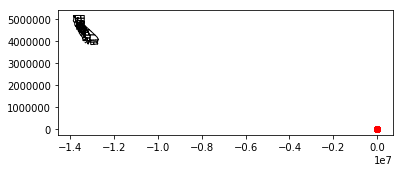

In [21]:

# We restrict to South America.
ax = cal_counties.plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

In [25]:
gdf.crs = {'init' :'epsg:4326'}

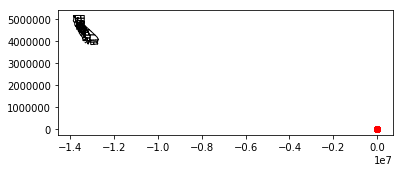

In [26]:

# We restrict to South America.
ax = cal_counties.plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

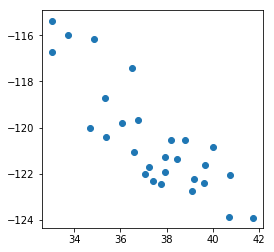

In [35]:
gdf.to_crs(epsg=4326).plot()

In [36]:
gdf

,id,longitude,latitude,idnum,mean_coeff,Coordinates
0,33.0360_-116.7329,33.0360,-116.7329,1,0.011094,POINT (33.036 -116.7329)
1,33.0396_-115.3653,33.0396,-115.3653,2,0.004231,POINT (33.0396 -115.3653)
2,33.7437_-115.9938,33.7437,-115.9938,3,0.005287,POINT (33.7437 -115.9938)
3,34.6730_-120.0167,34.6730,-120.0167,4,0.009353,POINT (34.673 -120.0167)
4,34.8415_-116.1784,34.8415,-116.1784,5,0.001002,POINT (34.8415 -116.1784)
5,35.3429_-118.7298,35.3429,-118.7298,6,0.009961,POINT (35.3429 -118.7298)
6,35.3871_-120.4040,35.3871,-120.4040,7,0.003994,POINT (35.3871 -120.404)
7,36.0753_-119.8155,36.0753,-119.8155,8,0.010705,POINT (36.0753 -119.8155)
8,36.5111_-117.4108,36.5111,-117.4108,9,0.015198,POINT (36.5111 -117.4108)
9,36.6057_-121.0750,36.6057,-121.0750,10,0.006494,POINT (36.6057 -121.075)


In [28]:
gdf.crs

{'init': 'epsg:4326'}

In [41]:
new_gdf = gdf.to_crs({'init': 'epsg:2227'})

RuntimeError: b'latitude or longitude exceeded limits'

In [29]:
cal_counties.crs

{'init': 'epsg:3857'}

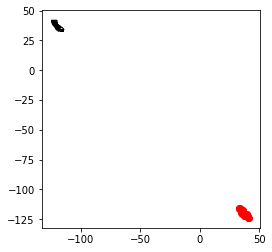

In [31]:
# We restrict to South America.
ax = cal_counties.to_crs(epsg=4326).plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

In [ ]:
#Reading in the newly created file
#assigning the csv to a variable
tempbycounty ='maxtempbyocounty.csv'

#reading the csv
cal_temps = pd.read_csv(tempbycounty)

#changing the column to upper case
cal_temps['county'] = mass_temps['county'].str.upper()

#alternatively, renaming the column upper case
mass_temps.rename(columns = {'county' :'COUNTY'}, inplace = True)

#showing the first 10 rows
mass_temps.head(10)

In [69]:
# You can see I use this pathway to find a shapefile
mass_link = prism_dir + 'COUNTIESSURVEY_POLYM.shp'
# I am reading this shapefile with geopandas, which can handle geopraphic data
mass_counties = gpd.read_file(mass_link)
mass_counties = mass_counties.set_index('COUNTY')

In [70]:
# You can see the first 5 lines of your dataset
mass_counties.head()

,FIPS_ID,POP1980,POP1990,POP2000,POP2010,POPCH80_90,POPCH90_00,POPCH00_10,SQ_MILES,SQ_KM,SHAPE_Leng,SHAPE_Area,geometry
COUNTY,,,,,,,,,,,,,
BARNSTABLE,25001,163130,186605,222230,215888,23475,35625,-6342,411.972382,1067.007839,1.290364e+06,1.067008e+09,(POLYGON ((308049.3425000012 871046.6845999993...
BERKSHIRE,25003,142428,139352,134953,131219,-3076,-4399,-3734,946.338216,2451.014533,2.471529e+05,2.451015e+09,"POLYGON ((75164.18249999732 940237.1845999993,..."
BRISTOL,25005,477902,506325,534678,548285,28423,28353,13607,570.766003,1478.283074,5.956754e+05,1.480725e+09,(POLYGON ((241907.8524999991 851743.8946000002...
DUKES,25007,10063,11639,14987,16535,1576,3348,1548,106.465249,275.744831,3.701720e+05,2.757448e+08,(POLYGON ((274929.9025000036 804009.5045999996...
ESSEX,25009,642743,670080,723419,743159,27337,53339,19740,513.105169,1328.941604,1.022055e+06,1.329235e+09,(POLYGON ((250194.9724999964 959315.3145999983...


In [ ]:
# Or specify how many lines you want to see
mass_counties.head(6)

### Test your knowledge: 
How would you look at the first 10 lines of your data? 
Can you guess how you can see the whole dataset? (the answer to this comes later in the notebook)

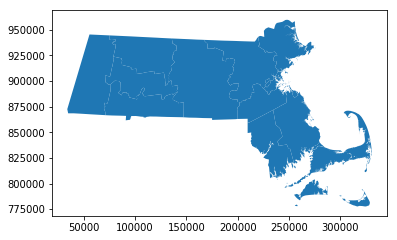

In [88]:
# This is the most basic way to plot spatial data
mass_counties.plot()


In [50]:
# You can make thematic maps by classifying the data by jenks, equal interval, etc. the same as in ArcGIS
# I am making breaks for population
classi = ps.Equal_Interval(mass_counties['POP2010'], k=7)
classi


                  Equal Interval                 
 
   Lower                Upper               Count
              x[i] <=  223445.286               6
 223445.286 < x[i] <=  436718.571               0
 436718.571 < x[i] <=  649991.857               3
 649991.857 < x[i] <=  863265.143               4
 863265.143 < x[i] <= 1076538.429               0
1076538.429 < x[i] <= 1289811.714               0
1289811.714 < x[i] <= 1503085.000               1

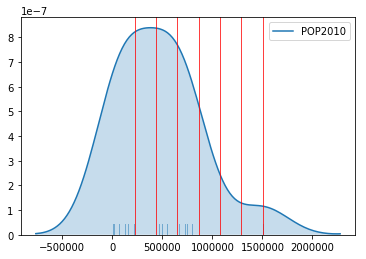

In [53]:
# You can look at the distribution of data and how you are breaking it with your classifying method
import seaborn as sns
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(mass_counties['POP2010'], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(mass_counties['POP2010'], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

### Intro to Thematic Mapping
We will do this with our temperature data, but first here are a couple of basic thematic maps just using population data.

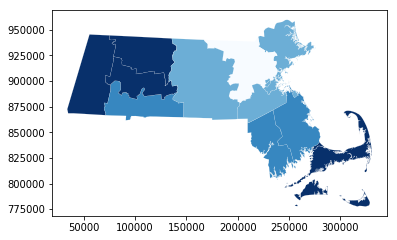

In [54]:
#Here is the first thematic map
mass_counties.plot(column='POP2010', scheme='equal_interval', k=7, 
         cmap=plt.cm.Blues_r, alpha=1, 
         edgecolor='w', linewidth=0.1)

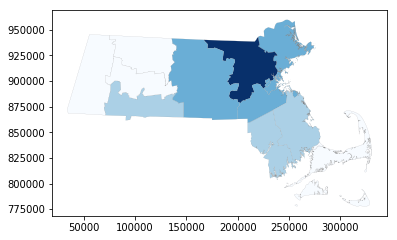

In [58]:
# I reversed the colors here
mass_counties.plot(column='POP2010', scheme='equal_interval', k=7, 
         cmap=plt.cm.Blues, alpha=1, 
         edgecolor='grey', linewidth=0.1)
# From this code can you tell how? (Hint: look at cmap)

# Using Stata in Jupyter
I originally captured the coefficients and created the dataset for the maximum temperature data in STATA. This following section will show you how to load STATA into Python, run an entire do file in Jupyter or go back and forth between STATA and Python code

## Note 1: 
This method only works if you have STATA installed on your computer. It is basically calling STATA from your terminal and running commands through the application. This allows you to integrate your workflows, but this is not a work around for using STATA if you do not have a license

## Note 2:
This will be a slightly different process for Windows and Linux users.
See this link: http://dev-ii-seminar.readthedocs.io/en/latest/notebooks/Stata_in_jupyter.html

In [6]:
# This first allows you to import STATA and configure it for use in your notebook
# The file path is where your executable file is contained in your file structure
import ipystata  
from ipystata.config import config_stata  
config_stata('/Applications/Stata/StataSE.app/Contents/MacOS/stataSE')

IPyStata is loaded in batch mode.


# Process note
After running the above step, you will have to restart your Kernel (only the first time). Then you can proceed to use STATA magics.

### Checking to see if Stata Works
I originally had a challenge getting the right file path. One way to check that it is right is by copying the path into your terminal and seeing if STATA will run.

Once you have it correctly installed, you just have to start every stata cell with `%%stata` and then write regular STATA commands

In [7]:
# using the display command
%%stata 
display "stata"





stata


In [4]:
#loading in data
%%stata
sysuse "Mass/counties_tempdata.dta"

In [16]:
# you can also push that data to a dataframe to use python commands on it easily
%%stata -o counties_df
sysuse "Mass/counties_tempdata.dta"


In [17]:
# you are now working with the data using python
counties_df.head()

,year,month,county,latitude,longitude,max_temp
0,1988,4,Barnstable,41.7262,-70.298897,50.700001
1,1988,5,Barnstable,41.7262,-70.298897,60.700001
2,1988,6,Barnstable,41.7262,-70.298897,72.500000
3,1988,7,Barnstable,41.7262,-70.298897,78.099998
4,1988,8,Barnstable,41.7262,-70.298897,79.900002


## You can run your entire Do File
I wrote some loops in STATA to create a variable with the coefficients of a regression of max tempearature on years by county and month. We mapped those coefficients in the next step, but I transfered this code into Jupyter.

In [6]:
%%stata
#load your data and check the variables for missing data
sysuse "Mass/counties_tempdata.dta"
foreach var in year month county latitude longitude max_temp {
codebook `var'
}

# I am creating a local variable of all the different counties so that I can run a loop
# Such a loop will basically say "do this for each county"
levelsof county
return list
local counties = r(levels)

# I also want to be able to do things for each month
levelsof month
local months = r(levels)

# I am running a regression to see if the max temp is increasing each year in a given month
foreach mnth in `months' {
reg max_temp year if month == `mnth'
}

# I am running a regression to see if max temp is increasing each year in a given county
foreach cnty in `counties' {
reg max_temp year if county == "`cnty'"
}

# Really I want to capture the coefficient of the changing max temperatures over time 
# I am saving the coefficient of a regression for the max temp change over time in a given month and county
gen coeff = 0

levelsof month
local months = r(levels)
levelsof county
local counties = r(levels)
foreach mnth in `months' {
foreach cnty in `counties' {
reg max_temp year if month == `mnth' & county == "`cnty'"
gen coeff`cnty'`mnth' = _b[year]
replace coeff = coeff`cnty'`mnth' if county == "`cnty'" & month == `mnth'
}
}

#Now I need to average this change (over all the months) by county
bys county: egen mean_coeff = mean(coeff)
egen county_tag  = tag(county)

#Now that I created my county max temp change measure I want to only keep the relevant variables
#I also only want one row (observation) per county
keep if county_tag
keep mean_coeff county latitude longitude

#I am exporting this file. Without specifying the file path it is placed in the current working directory
#of your jupyter notebook
export delimited using "maxtempbyocounty.csv", replace



Unknown #command
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
year                                                                                                                                                                                             ï»¿Year
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [1988,2018]                  units:  1
         unique values:  31                       missing .:  0/2,520

                  mean:   2002.75
              std. dev:   8.66799

           percentiles:        10%       25%       50%       75%       90%
                              1991      1995      2003     

# Back to Python

We created our variable with STATA and now we can work with the outputted csv using Python!

In [10]:
#Reading in the newly created file
#assigning the csv to a variable
tempbycounty ='maxtempbyocounty.csv'

#reading the csv
mass_temps = pd.read_csv(tempbycounty)

#changing the column to upper case
mass_temps['county'] = mass_temps['county'].str.upper()

#alternatively, renaming the column upper case
mass_temps.rename(columns = {'county' :'COUNTY'}, inplace = True)

#showing the first 10 rows
mass_temps.head(10)

,COUNTY,latitude,longitude,mean_coeff
0,BARNSTABLE,41.726200,-70.298897,0.066452
1,BERKSHIRE,42.370701,-73.206398,0.049553
2,BRISTOL,41.801201,71.114899,0.028483
3,DUKES,41.395599,70.658997,0.051400
4,ESSEX,42.673100,70.956100,0.041192
5,FRANKLIN,42.583099,72.591904,0.021960
6,HAMPDEN,42.135101,-72.631599,0.040037


In [83]:
#Making county the index
mass_temps = mass_temps.set_index('COUNTY')
mass_temps.head()

,latitude,longitude,mean_coeff
COUNTY,,,
BARNSTABLE,41.726200,-70.298897,0.066452
BERKSHIRE,42.370701,-73.206398,0.049553
BRISTOL,41.801201,71.114899,0.028483
DUKES,41.395599,70.658997,0.051400
ESSEX,42.673100,70.956100,0.041192


In [84]:
#Showing the full file by typing its dataframe name
mass_temps

,latitude,longitude,mean_coeff
COUNTY,,,
BARNSTABLE,41.726200,-70.298897,0.066452
BERKSHIRE,42.370701,-73.206398,0.049553
BRISTOL,41.801201,71.114899,0.028483
DUKES,41.395599,70.658997,0.051400
ESSEX,42.673100,70.956100,0.041192
FRANKLIN,42.583099,72.591904,0.021960
HAMPDEN,42.135101,-72.631599,0.040037
HAMPSHIRE,42.340099,-72.663902,0.028472
MIDDLESEX,42.485500,-71.382004,0.027349


In [91]:
#joining data from mass_counties with the temperature data
county_temps = mass_counties.join(mass_temps)
county_temps.head()

,FIPS_ID,POP1980,POP1990,POP2000,POP2010,POPCH80_90,POPCH90_00,POPCH00_10,SQ_MILES,SQ_KM,SHAPE_Leng,SHAPE_Area,geometry,latitude,longitude,mean_coeff
COUNTY,,,,,,,,,,,,,,,,
BARNSTABLE,25001,163130,186605,222230,215888,23475,35625,-6342,411.972382,1067.007839,1.290364e+06,1.067008e+09,(POLYGON ((308049.3425000012 871046.6845999993...,41.726200,-70.298897,0.066452
BERKSHIRE,25003,142428,139352,134953,131219,-3076,-4399,-3734,946.338216,2451.014533,2.471529e+05,2.451015e+09,"POLYGON ((75164.18249999732 940237.1845999993,...",42.370701,-73.206398,0.049553
BRISTOL,25005,477902,506325,534678,548285,28423,28353,13607,570.766003,1478.283074,5.956754e+05,1.480725e+09,(POLYGON ((241907.8524999991 851743.8946000002...,41.801201,71.114899,0.028483
DUKES,25007,10063,11639,14987,16535,1576,3348,1548,106.465249,275.744831,3.701720e+05,2.757448e+08,(POLYGON ((274929.9025000036 804009.5045999996...,41.395599,70.658997,0.051400
ESSEX,25009,642743,670080,723419,743159,27337,53339,19740,513.105169,1328.941604,1.022055e+06,1.329235e+09,(POLYGON ((250194.9724999964 959315.3145999983...,42.673100,70.956100,0.041192


# Making Temperature Thematic Maps

Below I made several thematic maps using the dataset we created. You can see the steps to create the map in more detail in the following lab: http://darribas.org/gds17/content/labs/lab_03.pdf 

In [94]:
#Preparing to create a thematic map you want to set how you are breaking data into categories
#Using Equal intervals and 7 categories, we can see the different breaks
classi2 = ps.Equal_Interval(county_temps['mean_coeff'], k=7)
classi2


            Equal Interval           
 
Lower          Upper            Count
        x[i] <= 0.028               4
0.028 < x[i] <= 0.035               4
0.035 < x[i] <= 0.041               1
0.041 < x[i] <= 0.047               2
0.047 < x[i] <= 0.054               2
0.054 < x[i] <= 0.060               0
0.060 < x[i] <= 0.066               1

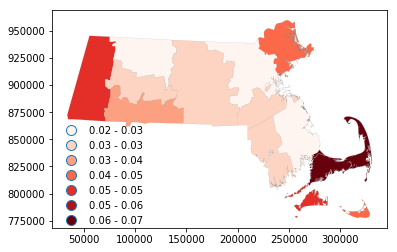

In [120]:
# Plotting the first figure
# You have to set the figure size and axis
fig, ax = plt.subplots(1)
# Then you plot the data, choose your colors, legend, breakdown method (how you are putting data into bins), etc.
county_temps.plot(column='mean_coeff', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Reds, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
# I played around with getting the legend in the right place to not overlap with the figure
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0., 0.2, 0.51))
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_facecolor('none')
plt.savefig('mass_tempmap3.png')

In [97]:
#You can sort values
county_temps.sort_values(by='mean_coeff', ascending=False)

,FIPS_ID,POP1980,POP1990,POP2000,POP2010,POPCH80_90,POPCH90_00,POPCH00_10,SQ_MILES,SQ_KM,SHAPE_Leng,SHAPE_Area,geometry,latitude,longitude,mean_coeff
COUNTY,,,,,,,,,,,,,,,,
BARNSTABLE,25001,163130,186605,222230,215888,23475,35625,-6342,411.972382,1067.007839,1.290364e+06,1.067008e+09,(POLYGON ((308049.3425000012 871046.6845999993...,41.726200,-70.298897,0.066452
DUKES,25007,10063,11639,14987,16535,1576,3348,1548,106.465249,275.744831,3.701720e+05,2.757448e+08,(POLYGON ((274929.9025000036 804009.5045999996...,41.395599,70.658997,0.051400
BERKSHIRE,25003,142428,139352,134953,131219,-3076,-4399,-3734,946.338216,2451.014533,2.471529e+05,2.451015e+09,"POLYGON ((75164.18249999732 940237.1845999993,...",42.370701,-73.206398,0.049553
NANTUCKET,25019,5876,6012,9520,10172,136,3508,652,48.911020,126.679467,1.680315e+05,1.266795e+08,(POLYGON ((322020.1225000024 794028.6845999993...,41.278400,-70.073700,0.046055
ESSEX,25009,642743,670080,723419,743159,27337,53339,19740,513.105169,1328.941604,1.022055e+06,1.329235e+09,(POLYGON ((250194.9724999964 959315.3145999983...,42.673100,70.956100,0.041192
HAMPDEN,25013,442719,456310,456228,463490,13591,-82,7262,634.113428,1642.352809,2.758305e+05,1.642353e+09,"POLYGON ((84998.07249999791 899852.9345999993,...",42.135101,-72.631599,0.040037
WORCESTER,25027,654020,709679,750963,798552,55659,41284,47589,1579.149579,4089.994993,3.581559e+05,4.089995e+09,"POLYGON ((167464.7424999997 939313.1746000014,...",42.351398,-71.907700,0.033791
NORFOLK,25021,603627,616087,650496,670850,12460,34409,20354,409.444694,1060.461131,3.158034e+05,1.060461e+09,"(POLYGON ((219129.012500003 897474.7045999989,...",42.159599,-71.213600,0.032610
BRISTOL,25005,477902,506325,534678,548285,28423,28353,13607,570.766003,1478.283074,5.956754e+05,1.480725e+09,(POLYGON ((241907.8524999991 851743.8946000002...,41.801201,71.114899,0.028483


Text(0.5,1,'Temperature Change in MA Counties (Average Temperature Increase of Max Monthly Temperatures per Year from 1988-2018)')

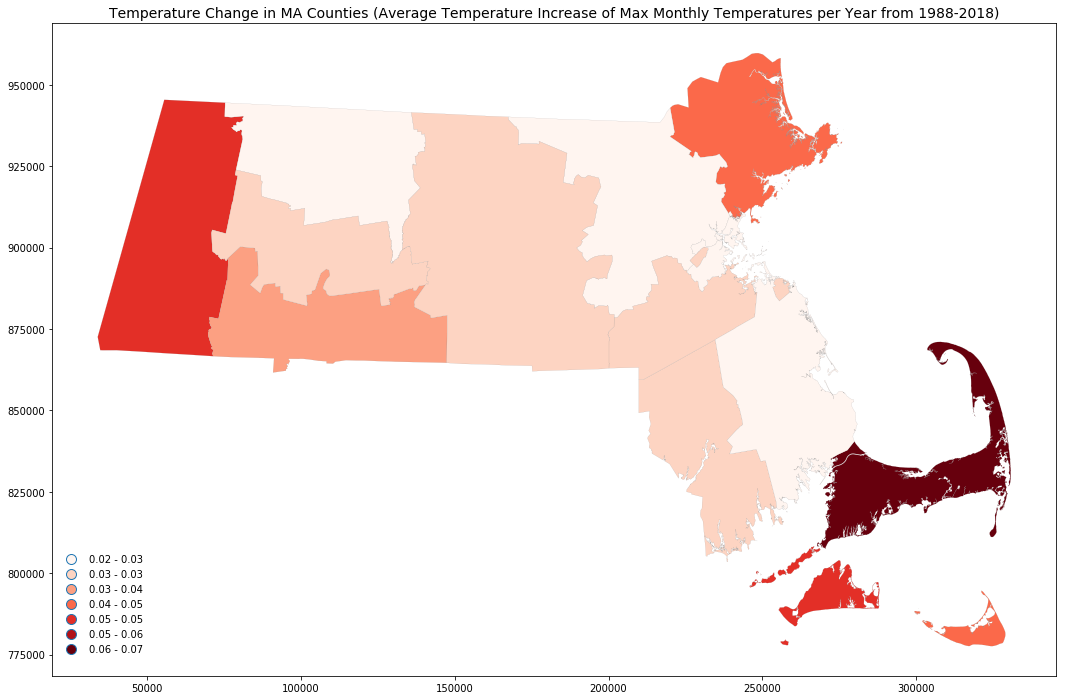

In [143]:
# I made the figure much bigger to make it more visible and added a title
fig, ax = plt.subplots(1, figsize = (18,12))
county_temps.plot(column='mean_coeff', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Reds, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.1, 0., 0., 0.2))
leg.get_frame().set_linewidth(0.0)
leg.get_frame().set_facecolor('none')

plt.title("Temperature Change in MA Counties (Average Temperature Increase of Max Monthly Temperatures per Year from 1988-2018)", size=14)


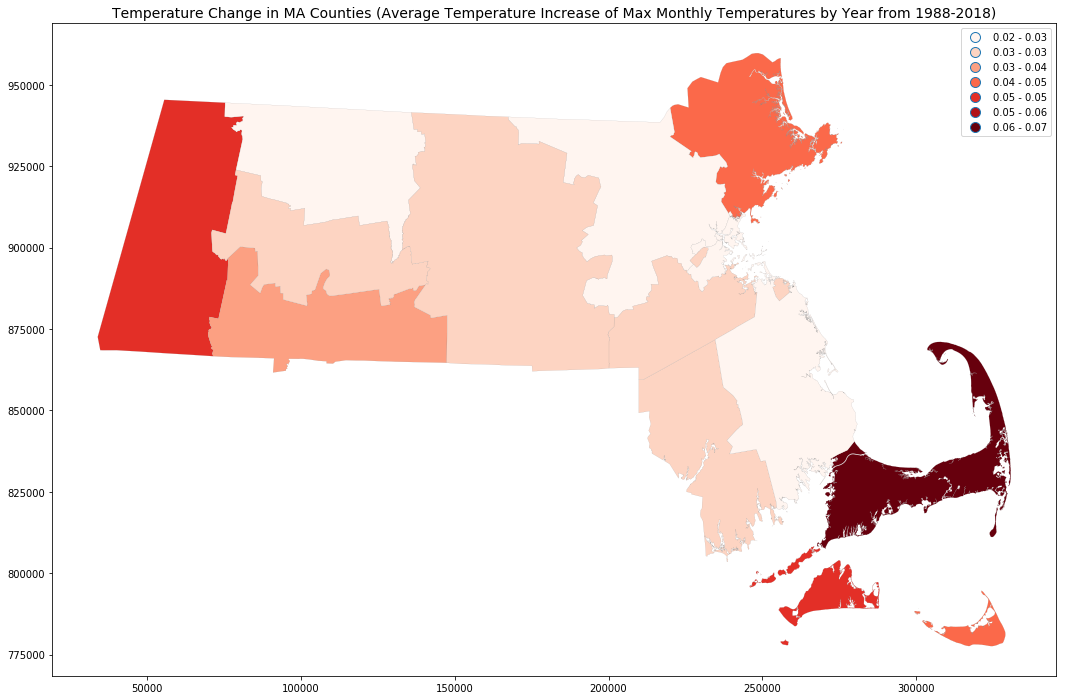

In [146]:
# I changed the legend to the top right and created my final map
fig, ax = plt.subplots(1, figsize = (18,12))
county_temps.plot(column='mean_coeff', legend = True, scheme='equal_interval', k=7, 
         cmap=plt.cm.Reds, alpha=1, ax=ax,
         edgecolor='grey', linewidth=0.1)
plt.title("Temperature Change in MA Counties (Average Temperature Increase of Max Monthly Temperatures by Year from 1988-2018)", size=14)
# I saved the image into the working directory to send around
plt.savefig('mass_tempmapwithlegend.png')

# This is how you install and use R

To install r you can follow this link: https://anaconda.org/r/rpy2
And run `conda install -c r rpy2` from your terminal

Then you will load the r extension and use the `%R` magics to access r code

### To Note:
This is only one way to use R in Jupyter. You can also create a separate Jupyter notebook that works entirely using R (R kernel) if you follow this link: https://www.datacamp.com/community/blog/jupyter-notebook-r#gs.z0gxLNc



In [1]:
#This loads the r extension
%load_ext rpy2.ipython

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%R require(ggplot2); require(tidyr)

array([1], dtype=int32)

In [4]:
import numpy as np
import pandas as pd 
np.random.seed(42)
# Make a pandas DataFrame
df = pd.DataFrame(np.random.normal(0,1,size=(100, 3)), columns=list('ABC'))
df['C'] = df['C'] + 2

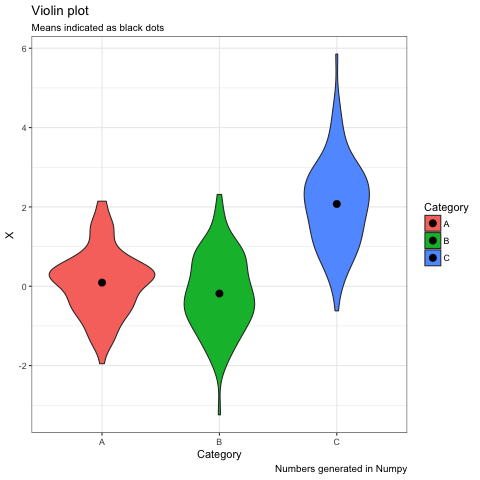

In [5]:
%%R -i df
df %>% 
  gather("Category", "X") %>%
  ggplot(aes(x = Category, y = X, fill = Category)) +
    geom_violin() +
    stat_summary(fun.y=mean, color='black', geom='point', size = 3) +
    labs(title = "Violin plot",
         subtitle = "Means indicated as black dots",
         captions = "Numbers generated in Numpy") +
    theme_bw()

### As an aside:
You may want to know what environment you are running to understand what modules are at your disposal. On a Mac, you can run the below code.

In [21]:
import os
os.environ['PATH']

'/anaconda3/bin:/bin:/anaconda3/bin:/Library/Frameworks/Python.framework/Versions/2.7/bin:/Library/Frameworks/Python.framework/Versions/3.6/bin:/Library/Frameworks/Python.framework/Versions/3.6/bin:/Library/Frameworks/Python.framework/Versions/3.6/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin'

# More Exercises

Beyond showing the power of Jupyter to use multiple languages and modules, Henry and I each worked with python to create maps and clean data over.

The order of these exercises as follows:

1. Visualizing bike paths and wards of Boston
2. Cleaning and reshaping a wide dataset into a long dataset
3. Mapping the Watersheds, Ramsar sites, and Districts in Uganda

The first 2 points are contained in the next section **"Visualizing data with Python"**

# Visualizing data with Python

*this notebook includes several exercises using data from different sources: The city of Boston, the state of Massachussetts, and a dataset that I have compiled for my econometrics project*

## City of Boston

Boston maintains a large repository of GIS data accessible to the public, accessible at https://bostonopendata-boston.opendata.arcgis.com/. In the following exercise, I downloaded shapefiles and overlaid them on a map. 

In [61]:
#Import necessary libraries. 
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps
import palettable as pltt
from seaborn import palplot

In [62]:
#call path to Boston data
bos_dir = 'Henry/Wards/'
bike_dir = 'Henry/Existing_Bike_Network/'

In [63]:
#create dataframes
bos_link = bos_dir + 'Wards.shp'
bike_link = bike_dir + 'Existing_Bike_Network.shp'
bos = gpd.read_file(bos_link)
bike = gpd.read_file(bike_link)

In [64]:
bos.head

<bound method NDFrame.head of     OBJECTID  WARD  CNT_WARD    SHAPESTAre     SHAPESTLen  \
0          1     1        14  1.314264e+08  119239.372580   
1          2     2         7  3.751537e+07   59588.394725   
2          3     3         8  3.917341e+07   54946.494149   
3          4     4        10  2.918275e+07   33724.007474   
4          5     5        12  3.279699e+07   42505.549799   
5          6     9         5  1.874285e+07   25653.929605   
6          7     6         9  6.000757e+07   78986.190099   
7          8     7        10  3.596305e+07   36979.656963   
8          9     8         7  3.038907e+07   30643.116545   
9         10    12         9  4.622159e+07   33929.152553   
10        11    10         9  2.465275e+07   23308.195877   
11        12    11        10  3.284195e+07   36124.951012   
12        13    13        10  3.849732e+07   46404.636959   
13        14    14        14  5.276993e+07   39902.634646   
14        15    15         9  2.204063e+07   22619.1988

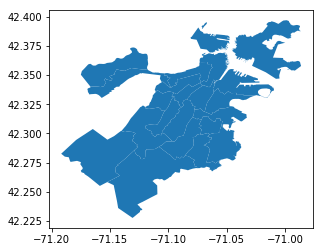

In [65]:
bos.plot()

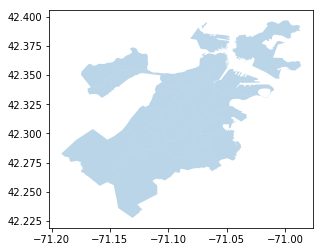

In [66]:
bos.plot(alpha=0.3)

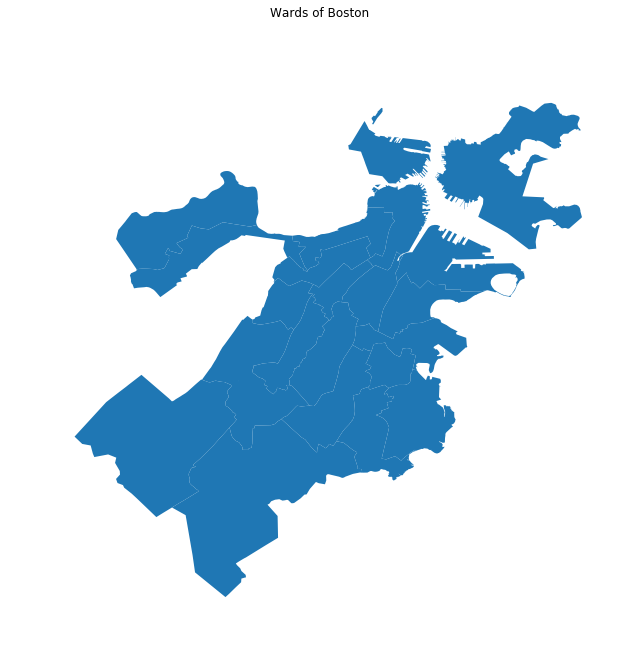

In [67]:
#Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(10,10))
#Add layer of polygons on the axis
bos.plot(ax=ax)
#Remove axis frames
ax.set_axis_off()
#Add title
f.suptitle('Wards of Boston')
#Display
plt.show()

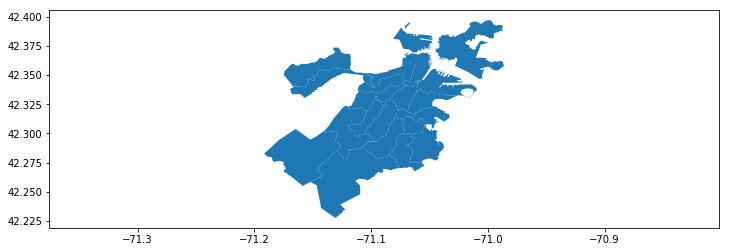

In [68]:
#Plotting map and maintaing an even scaling ratio
# Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(12, 4))
# Add layer of polygons on the axis
bos.plot(ax=ax)
# Force axis to be on the same unit
plt.axis('equal')
# Display
plt.show()

In [69]:
#check if we have info on coordinate reference system
bos.crs

{'init': 'epsg:4326'}

## Map of Boston and its Bike Paths

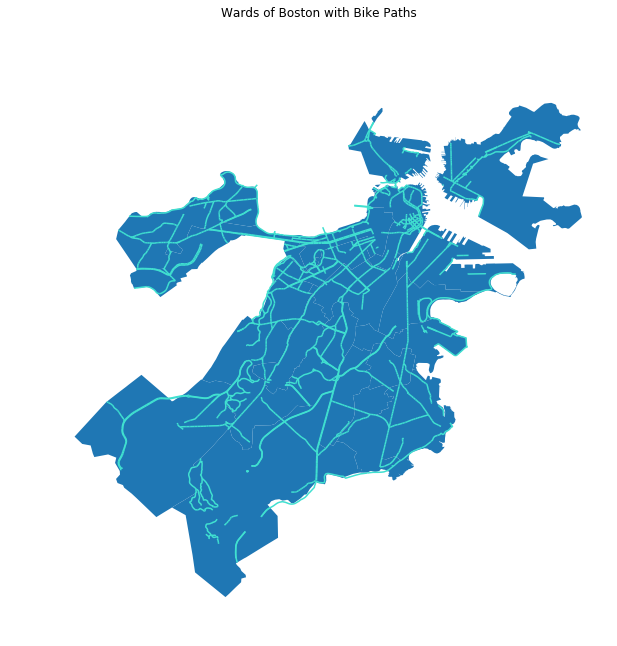

In [70]:
#Setup figure and axis with different size
f, ax = plt.subplots(1, figsize=(10,10))
#Add layer of polygons on the axis
bos.plot(ax=ax)
#Add layer of bike routes on the axis
bike.plot(ax=ax, color='turquoise')
#Remove axis frames
ax.set_axis_off()
#Add title
f.suptitle('Wards of Boston with Bike Paths')
#Display
plt.show()

### Investigation on Counties Data
This briefly shows you some of the basic steps you take to bring in a geospatial layer and more tricks to investigate the underlying data before mapping the information

In [71]:
#call path to Mass county data
county_dir2 = 'Henry/counties/'

In [72]:
county_link2 = county_dir2 + 'COUNTIES_POLY.shp'

In [73]:
#create geopandas dataframe
county2 = gpd.read_file(county_link2)

In [74]:
#show the first 20 observations
county2.head(20)

,FIPS_ID,COUNTY,AREA_ACRES,OBJECTID,SHAPE_AREA,SHAPE_LEN,geometry
0,25009,ESSEX,316205.8,1,1.279634e+09,480777.401542,"POLYGON ((242115.88 912141.38, 242104.67 91217..."
1,25009,ESSEX,119.1,2,4.818999e+05,3058.496339,"POLYGON ((254695.81 950209.75, 254577.41 95019..."
2,25009,ESSEX,31.5,3,1.273319e+05,1437.299536,"POLYGON ((255037.72 950436, 255118.27 950548.3..."
3,25009,ESSEX,1.3,4,5.383679e+03,318.295723,"POLYGON ((255527.28 949923.9399999999, 255467...."
4,25009,ESSEX,7.1,5,2.857241e+04,884.568271,"POLYGON ((256263.34 946235.4399999999, 256199...."
5,25009,ESSEX,6.3,6,2.564238e+04,696.052639,"POLYGON ((256167.42 945531, 256147 945545.38, ..."
6,25009,ESSEX,4.3,7,1.749900e+04,552.252207,"POLYGON ((252082.27 945474.63, 252020.53 94555..."
7,25009,ESSEX,6.6,8,2.662238e+04,604.791004,"POLYGON ((256460.56 945418.63, 256414.64 94544..."
8,25009,ESSEX,3.2,9,1.275785e+04,544.359251,"POLYGON ((251906.2 945251.1899999999, 251893.3..."
9,25003,BERKSHIRE,605697.0,10,2.451161e+09,247129.554132,"POLYGON ((75302.09 944514.88, 75165.09 940242...."


In [75]:
#show the last 20 observations
#this is an example of an incomplete dataset that we would have to clean a little
county2.tail(20)

,FIPS_ID,COUNTY,AREA_ACRES,OBJECTID,SHAPE_AREA,SHAPE_LEN,geometry
242,25007,DUKES,3.9,243,1.585929e+04,579.384216,"POLYGON ((249561.52 799614.13, 249497.47 79969..."
243,0,,41.2,244,1.665986e+05,1963.176358,"POLYGON ((269094.53 799299.88, 269104.5 799320..."
244,25007,DUKES,70.4,245,2.850353e+05,4161.486747,"POLYGON ((279595.81 796753.75, 279596.09 79672..."
245,25007,DUKES,585.4,246,2.368969e+06,15614.370779,"POLYGON ((247917.05 797053.0600000001, 247968...."
246,25007,DUKES,3.7,247,1.483412e+04,466.634835,"POLYGON ((278290.78 797828.13, 278249.63 79787..."
247,25007,DUKES,4.4,248,1.789272e+04,587.298362,"POLYGON ((279273.31 796543.75, 279197.53 79646..."
248,0,,43.4,249,1.755151e+05,2940.655636,"POLYGON ((280668.53 795554.6899999999, 280670...."
249,25007,DUKES,2.6,250,1.035996e+04,425.130405,"POLYGON ((283054.28 794641.4399999999, 282998...."
250,25019,NANTUCKET,29932.8,251,1.211314e+08,117405.711865,"POLYGON ((320406.97 783836.13, 320589.91 78383..."
251,0,,37.8,252,1.530066e+05,2169.383928,"POLYGON ((322137.97 793763.3100000001, 322212...."


In [76]:
# Looking at the type of layer
type(county2)

geopandas.geodataframe.GeoDataFrame

In [77]:
# Looking at the shape of the dataset (how many rows and columns)
county2.shape

(262, 7)

In [78]:
# Looking at the types of variables
county2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
FIPS_ID       262 non-null int64
COUNTY        262 non-null object
AREA_ACRES    262 non-null float64
OBJECTID      262 non-null int64
SHAPE_AREA    262 non-null float64
SHAPE_LEN     262 non-null float64
geometry      262 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 14.4+ KB


In [79]:
county_link2 = county_dir2 + 'COUNTIESSURVEY_POLYM.shp'

In [80]:
counties2 = gpd.read_file(county_link2)

In [81]:
counties2.shape

(14, 14)

In [82]:
# Looking at the full dataset
counties2

,FIPS_ID,COUNTY,POP1980,POP1990,POP2000,POP2010,POPCH80_90,POPCH90_00,POPCH00_10,SQ_MILES,SQ_KM,SHAPE_Leng,SHAPE_Area,geometry
0,25001,BARNSTABLE,163130,186605,222230,215888,23475,35625,-6342,411.972382,1067.007839,1.290364e+06,1.067008e+09,(POLYGON ((308049.3425000012 871046.6845999993...
1,25003,BERKSHIRE,142428,139352,134953,131219,-3076,-4399,-3734,946.338216,2451.014533,2.471529e+05,2.451015e+09,"POLYGON ((75164.18249999732 940237.1845999993,..."
2,25005,BRISTOL,477902,506325,534678,548285,28423,28353,13607,570.766003,1478.283074,5.956754e+05,1.480725e+09,(POLYGON ((241907.8524999991 851743.8946000002...
3,25007,DUKES,10063,11639,14987,16535,1576,3348,1548,106.465249,275.744831,3.701720e+05,2.757448e+08,(POLYGON ((274929.9025000036 804009.5045999996...
4,25009,ESSEX,642743,670080,723419,743159,27337,53339,19740,513.105169,1328.941604,1.022055e+06,1.329235e+09,(POLYGON ((250194.9724999964 959315.3145999983...
5,25011,FRANKLIN,64867,70092,71535,71372,5225,1443,-163,724.490236,1876.428602,2.528394e+05,1.876429e+09,"POLYGON ((135863.2224999964 941516.0945999995,..."
6,25013,HAMPDEN,442719,456310,456228,463490,13591,-82,7262,634.113428,1642.352809,2.758305e+05,1.642353e+09,"POLYGON ((84998.07249999791 899852.9345999993,..."
7,25015,HAMPSHIRE,141217,146568,152251,158080,5351,5683,5829,545.209001,1412.090477,2.805598e+05,1.412090e+09,"POLYGON ((88541.73250000179 915372.9345999993,..."
8,25017,MIDDLESEX,1369184,1398468,1465392,1503085,29284,66924,37693,846.409268,2192.198708,3.558664e+05,2.192199e+09,(POLYGON ((220051.9924999997 942903.9345999993...
9,25019,NANTUCKET,5876,6012,9520,10172,136,3508,652,48.911020,126.679467,1.680315e+05,1.266795e+08,(POLYGON ((322020.1225000024 794028.6845999993...


## Econometrics dataset

Much of the data management and analysis that you need to perform can be done directly using Python (instead of using STATA or another statistical software at all). For instance, to perform a fixed effects regression, I needed to convert my wide dataset to a panel dataset. At first, it had separate columns for each variable attached to a given year: for a given observation, I had columns for GDP in 2002, GDP in 2007, GDP in 2012, and GDP in 2016. I needed multiple observations representing different years for the same variable. The following exercise shows how I created a panel dataset. 

In [8]:
# This ensures visualizations are plotted inside the notebook
%matplotlib inline

import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import seaborn as sns  # This allows us to easily and beautifully plot
import numpy as np

f = 'sample.csv'
db = pd.read_csv(f)

In [9]:
db.shape

(176, 55)

In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 55 columns):
Country                          176 non-null object
CPI_16                           176 non-null int64
CPI_12                           176 non-null object
CPI_07                           176 non-null object
CPI_07_trans                     176 non-null object
CPI_02                           174 non-null object
CPI_02_trans                     176 non-null object
FDI_16                           174 non-null object
FDI_12                           174 non-null object
FDI_07                           175 non-null object
FDI_02                           173 non-null object
POP_02                           174 non-null float64
POP_07                           174 non-null float64
POP_12                           174 non-null object
POP_16                           174 non-null object
GDP_CAP_02                       174 non-null object
GDP_CAP_07                       174 non-null 

In [11]:
db

,Country,CPI_16,CPI_12,CPI_07,CPI_07_trans,CPI_02,CPI_02_trans,FDI_16,FDI_12,FDI_07,...,Regulatory Quality 2012,Regulatory Quality 2016,Rule of Law 2002,Rule of Law 2007,Rule of Law 2012,Rule of Law 2016,Voice and Accountability 2002,Voice and Accountability 2007,Voice and Accountability 2012,Voice and Accountability 2016
0,Afghanistan,15,8,1.8,18,NaN,0,98995722.4,47226787.5,188690000,...,-1.193120,-1.327920,-1.67082,-1.82967,-1.643160,-1.616430,-1.43342,-1.05765,-1.267430,-1.086220
1,Albania,39,33,2.9,29,2.5,25,1087540000,920090000,652270000,...,0.199169,0.188962,-0.76215,-0.6463,-0.520320,-0.347470,-0.00815,0.113008,0.022064,0.159191
2,Algeria,34,34,3,30,-,#VALUE!,1637370975,1500402453,1686736540,...,-1.276870,-1.171840,-0.63016,-0.77275,-0.772280,-0.849320,-1.04466,-0.98412,-0.906030,-0.877240
3,Angola,18,22,2.2,22,1.7,17,4104422620,-6.90E+09,-893342152,...,-0.969780,-1.001380,-1.61733,-1.3659,-1.269550,-1.080520,-1.23878,-1.18531,-1.076250,-1.167360
4,Argentina,36,35,2.9,29,2.8,28,3260164342,1.53E+10,6473150000,...,-0.929220,-0.469680,-0.758,-0.5916,-0.679680,-0.345990,0.260063,0.448621,0.295210,0.540847
5,Armenia,33,34,3,30,-,#VALUE!,338115182,496636701,667671562,...,0.349337,0.249980,-0.42327,-0.49838,-0.417910,-0.105170,-0.44442,-0.75938,-0.570490,-0.617280
6,Australia,79,85,8.6,86,8.6,86,4.20E+10,5.76E+10,4.44E+10,...,1.786468,1.897101,1.79999,1.761237,1.766946,1.752019,1.407233,1.3692,1.499190,1.300535
7,Austria,75,69,8.1,81,7.8,78,-3.00E+10,5219630177,6.89E+10,...,1.524189,1.440451,1.891656,1.960128,1.858179,1.777863,1.307497,1.369262,1.448773,1.290309
8,Azerbaijan,30,27,2.1,21,2,20,4499666000,5293250000,4594234000,...,-0.455590,-0.282160,-0.90866,-0.87931,-0.834510,-0.565590,-0.98129,-1.2334,-1.299480,-1.602720
9,Bahamas,66,71,-,#VALUE!,-,#VALUE!,73723568.4,526171000,713350000,...,0.395024,0.257600,1.430701,1.266324,0.619722,0.229196,1.188937,1.098432,0.934574,0.940302


In [12]:
# Renaming all the columns so the program can recognize that there is year information present
db2 = db.rename(index=str, columns={'CPI_16':'CPI2016', 'CPI_12':'CPI2012', 'CPI_07_trans':'CPI2007', 'CPI_02_trans':'CPI2002',\
                                   'FDI_16': 'FDI2016', 'FDI_12':'FDI2012', 'FDI_07':'FDI2007', 'FDI_02':'FDI2002', 'POP_16':\
                                    'POP2016','POP_12':'POP2012', 'POP_07':'POP2007','POP_02':'POP2002', 'GDP_CAP_02':'GDPCAP2002',\
                                   'GDP_CAP_07':'GDPCAP2007','GDP_CAP_12':'GDPCAP2012','GDP_CAP_16':'GDPCAP2016','GDP_02':'GDP2002',\
                                   'GDP_07':'GDP2007','GDP_12':'GDP2012','GDP_16':'GDP2016','EXP_GDP_02':'EXPGDP2002',\
                                   'EXP_GDP_07':'EXPGDP2007','EXP_GDP_12':'EXPGDP2012','EXP_GDP_16':'EXPGDP2016',\
                                   'UNEMPLOYED_02':'UNP2002','UNEMPLOYED_07':'UNP2007','UNEMPLOYED_12':'UNP2012',\
                                   'UNEMPLOYED_16':'UNP2016','Control of Corruption 2002':'COC2002','Control of Corruption 2007':'COC2007',\
                                   'Control of Corruption 2012':'COC2012','Control of Corruption 2016':'COC2016', 'Government Effectiveness 2002':'GEF2002',\
                                   'Government Effectiveness 2007':'GEF2007', 'Government Effectiveness 2012':'GEF2012','Government Effectiveness 2016':'GEF2016',\
                                   'Political Stability 2002':'PSTAB2002','Political Stability 2007':'PSTAB2007','Political Stability 2012':'PSTAB2012',\
                                   'Political Stability 2016':'PSTAB2016','Regulatory Quality 2002':'RQUAL2002','Regulatory Quality 2007':'RQUAL2007',\
                                   'Regulatory Quality 2012':'RQUAL2012','Regulatory Quality 2016':'RQUAL2016','Rule of Law 2002':'RULE2002',\
                                   'Rule of Law 2007':'RULE2007','Rule of Law 2012':'RULE2012','Rule of Law 2016':'RULE2016','Voice and Accountability 2002':'VAC2002',\
                                   'Voice and Accountability 2007':'VAC2007','Voice and Accountability 2012':'VAC2012','Voice and Accountability 2016':'VAC2016'})

In [13]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 0 to 175
Data columns (total 55 columns):
Country       176 non-null object
CPI2016       176 non-null int64
CPI2012       176 non-null object
CPI_07        176 non-null object
CPI2007       176 non-null object
CPI_02        174 non-null object
CPI2002       176 non-null object
FDI2016       174 non-null object
FDI2012       174 non-null object
FDI2007       175 non-null object
FDI2002       173 non-null object
POP2002       174 non-null float64
POP2007       174 non-null float64
POP2012       174 non-null object
POP2016       174 non-null object
GDPCAP2002    174 non-null object
GDPCAP2007    174 non-null object
GDPCAP2012    174 non-null object
GDPCAP2016    174 non-null object
GDP2002       174 non-null object
GDP2007       174 non-null object
GDP2012       174 non-null object
GDP2016       174 non-null object
EXPGDP2002    174 non-null object
EXPGDP2007    174 non-null object
EXPGDP2012    174 non-null object
EXPGDP2016    1

In [14]:
# Dropping data from the wrong years
db3 = db2.drop(['CPI_07','CPI_02'], axis=1)

In [15]:
db3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, 0 to 175
Data columns (total 53 columns):
Country       176 non-null object
CPI2016       176 non-null int64
CPI2012       176 non-null object
CPI2007       176 non-null object
CPI2002       176 non-null object
FDI2016       174 non-null object
FDI2012       174 non-null object
FDI2007       175 non-null object
FDI2002       173 non-null object
POP2002       174 non-null float64
POP2007       174 non-null float64
POP2012       174 non-null object
POP2016       174 non-null object
GDPCAP2002    174 non-null object
GDPCAP2007    174 non-null object
GDPCAP2012    174 non-null object
GDPCAP2016    174 non-null object
GDP2002       174 non-null object
GDP2007       174 non-null object
GDP2012       174 non-null object
GDP2016       174 non-null object
EXPGDP2002    174 non-null object
EXPGDP2007    174 non-null object
EXPGDP2012    174 non-null object
EXPGDP2016    174 non-null object
UNP2002       174 non-null object
UNP2007       1

In [16]:
list(db3.columns.values)

['Country',
 'CPI2016',
 'CPI2012',
 'CPI2007',
 'CPI2002',
 'FDI2016',
 'FDI2012',
 'FDI2007',
 'FDI2002',
 'POP2002',
 'POP2007',
 'POP2012',
 'POP2016',
 'GDPCAP2002',
 'GDPCAP2007',
 'GDPCAP2012',
 'GDPCAP2016',
 'GDP2002',
 'GDP2007',
 'GDP2012',
 'GDP2016',
 'EXPGDP2002',
 'EXPGDP2007',
 'EXPGDP2012',
 'EXPGDP2016',
 'UNP2002',
 'UNP2007',
 'UNP2012',
 'UNP2016',
 'COC2002',
 'COC2007',
 'COC2012',
 'COC2016',
 'GEF2002',
 'GEF2007',
 'GEF2012',
 'GEF2016',
 'PSTAB2002',
 'PSTAB2007',
 'PSTAB2012',
 'PSTAB2016',
 'RQUAL2002',
 'RQUAL2007',
 'RQUAL2012',
 'RQUAL2016',
 'RULE2002',
 'RULE2007',
 'RULE2012',
 'RULE2016',
 'VAC2002',
 'VAC2007',
 'VAC2012',
 'VAC2016']

### Here is the Key Moment
The below command is something that you can do in STATA, but also when you are working with data using Python. This **reshapes** the dataset from being wide to long. 

Can you figure out how to reshape the resulting dataframe (db4) back to wide?

In [17]:
db4 = pd.wide_to_long(db3, ['CPI','FDI','POP','GDPCAP','GDP','EXPGDP','UNP','COC','GEF','PSTAB',\
'RQUAL','RULE','VAC'], i= 'Country', j='year')

In [18]:
db4

CPI         FDI          POP    GDPCAP  \
Country                  year                                               
Afghanistan              2002        0    50000000  2.19799e+07  187.8451   
                         2007       18   188690000  2.66168e+07  369.8358   
                         2012        8  47226787.5     30696958  669.0091   
                         2016       15  98995722.4     34656032  561.7787   
Albania                  2002       25   135000000  3.05101e+06  1453.643   
                         2007       29   652270000  2.97002e+06  3603.014   
                         2012       33   920090000      2900401  4247.614   
                         2016       39  1087540000      2876101  4124.982   
Algeria                  2002  #VALUE!  1065000000   3.1995e+07  1774.034   
                         2007       30  1686736540  3.43001e+07  3935.183   
                         2012       34  1500402453     37565847  5565.135   
                         2016       34  1637370975     40606052  3916.882   
Angola                   2002       17  1743504000  1.75726e+07  711.1817   
                         2007       22  -893342152  2.09977e+07  2878.837   
                         2012       22   -6.90E+09     25096150   4598.25   
                         2016       18  4104422620     28813463    3308.7   
Argentina                2002       28  2148910000  3.78894e+07  2579.193   
                         2007       29  6473150000  3.99702e+07  7193.618   
                         2012       35    1.53E+10     42096739  12969.71   
                         2016       36  3260164342     43847430  12440.32   
Armenia                  2002  #VALUE!   110725326   3.0339e+06  783.2616   
                         2007       30   667671562  2.93306e+06  3138.809   
                         2012       34   496636701      2881922  3684.805   
                         2016       33   338115182      2924816  3614.688   
Australia                2002       86    1.47E+10  1.96514e+07  20081.82   
                         2007       86    4.44E+10  2.08276e+07  40991.98   
                         2012       85    5.76E+10     22728254  67635.32   
                         2016       79    4.20E+10     24127159  49755.32   
Austria                  2002       78   318132393  8.08196e+06  26401.75   
                         2007       81    6.89E+10  8.29549e+06  46855.77   
...                                ...         ...          ...       ...   
United States of America 2012       73    2.50E+11     3.14E+08  51450.12   
                         2016       74    4.79E+11     3.23E+08  57638.16   
Uruguay                  2002       51   179852188  3.32777e+06  4088.769   
                         2007       67  1358736506  3.33974e+06  7009.697   
                         2012       72  6047489727      3396777  15092.07   
                         2016       71  -317141167      3444006  15220.57   
Uzbekistan               2002       29    65300000  2.52718e+07  383.3495   
                         2007       17   705200000   2.6868e+07  830.4077   
                         2012       17   563040000     29774500  1740.468   
                         2016       21  66502368.2     31848200  2110.668   
Venezuela                2002       25   761000000  2.54087e+07  3655.976   
                         2007       20  4358000000   2.7692e+07  8318.803   
                         2012       19  4986000000     29893080     12755   
                         2016       17  1587000000     31568179        ..   
Vietnam                  2002       24  1400000000  7.95377e+07   427.838   
                         2007       26  6700000000  8.42185e+07  901.3249   
                         2012       31  8368000000     88809200  1722.684   
                         2016       33    1.26E+10     92701100  2170.648   
Yemen                    2002  #VALUE!   114301962  1.89192e+07  565.2084   
                         2007  

In [19]:
# exporting it to a csv file for my group
db4.to_csv('countrypanel.csv')

# Uganda Project

The end goal of this project is to create a map that shows project areas for a UNDP wetland restoration project in Uganda in relation to watersheds, waterbodies, and international wetlands of importance (Ramsar sites). 

### To note: 
You would not need to import modules if you had imported them anywhere else in the notebook. We combined several notebooks into one so I included all of the modules for good measure.

Some of this should look familiar so I have only commented the new information.

In [22]:
# importing modules
%matplotlib inline
import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data_path = 'Uganda/'

In [24]:
districts = gpd.read_file(data_path +'District_Boundaries_2014/District_Boundaries_2014.shp')
plt.show()

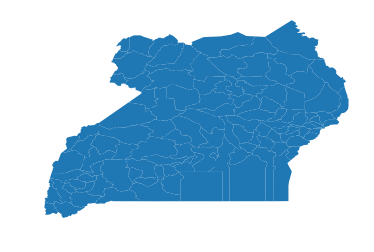

In [25]:
# basic plot
f, ax = plt.subplots(1)
# Plot layer of polygons on the axis
districts.plot(ax=ax)
# Remove axis frames
ax.set_axis_off()
# Display
plt.show()

In [26]:
districts = districts.set_index('DNAME2014')

In [27]:
# Describe the dataset - this is similar to summarize in STATA
districts.describe()

,OBJECTID,HH2014,HHSIZE2014,MALES2014,FEMALE2014,POP_2014,POP_URBAN,POP_RURAL,POP2013,POP2010,HH2010,POP2002,HH2002,F1991_2002,F2002_2014,F1969_2014,TotCon2011,ACCS_ELE_H
count,112.000000,112.000000,112.000000,112.000000,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,1.120000e+02,112.000000,1.120000e+02,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,56.500000,67057.473214,4.848724,153658.723214,1.622625e+05,3.105362e+05,5.784510e+04,2.526911e+05,3.156875e+05,2.807746e+05,57653.918089,2.182329e+05,45774.660714,3.560982,2.996875,2.917857,3401.491417,2.796837
std,32.475632,64744.519163,0.678123,122697.821426,1.339788e+05,2.534597e+05,1.553215e+05,1.731643e+05,2.365820e+05,2.054576e+05,42188.427768,1.596926e+05,37893.580635,2.124922,1.576899,0.958946,14687.735252,5.525379
min,1.000000,14439.000000,2.514250,30633.000000,2.277300e+04,5.340600e+04,2.862000e+03,0.000000e+00,5.550000e+04,4.472932e+04,9184.665474,3.476600e+04,9460.000000,0.470000,-2.900000,1.020000,0.000000,0.000000
25%,28.750000,34079.000000,4.413917,85700.500000,9.307650e+04,1.785122e+05,1.322750e+04,1.575600e+05,1.836750e+05,1.581666e+05,32477.749594,1.229355e+05,25497.750000,2.297500,2.125000,2.320000,80.968167,0.185017
50%,56.500000,47718.000000,4.803123,117591.000000,1.249100e+05,2.438755e+05,2.400000e+04,2.073630e+05,2.568500e+05,2.317643e+05,47590.204399,1.801395e+05,35658.000000,3.260000,2.925000,2.780000,494.637123,1.118002
75%,84.250000,78206.750000,5.245953,187217.500000,1.996922e+05,3.885272e+05,5.288875e+04,3.153302e+05,4.096500e+05,3.439186e+05,70619.829747,2.673118e+05,57708.750000,4.117500,3.617500,3.457500,1921.026533,3.331380
max,112.000000,504620.000000,7.557916,952781.000000,1.054919e+06,2.007700e+06,1.516196e+06,1.369213e+06,1.788600e+06,1.529929e+06,314153.813233,1.189142e+06,306178.000000,14.780000,9.620000,7.160000,132840.617722,42.285216


## Creating slices
This is really important. Basically, you can create slices of the dataset that include only the information that you want to work with. You can either just view the information (like I did in the following cell) or you can assign that slice to a variable to make a subset of your dataset that you map or work with separately.

In [28]:

districts.loc[['KABALE', 'KISORO', 'KANUGU', 'RUKUNGIRI', 'GREATER BUSHENYI', 'NTUNGAMO'], :]

,OBJECTID,SUBREGION,REGION,HH2014,HHSIZE2014,MALES2014,FEMALE2014,POP_2014,POP_URBAN,POP_RURAL,...,F1969_2014,TotCon2011,ACCS_ELE_H,STATUS,GlobalID,CreationDa,Creator,EditDate,Editor,geometry
DNAME2014,,,,,,,,,,,,,,,,,,,,,
KABALE,37.0,SOUTH WESTERN,WESTERN REGION,141187.0,4.226440,290068.0,318433.0,534160.0,76568.0,457592.0,...,1.89,5214.072167,4.306272,Electrified,3ab62260-efa1-4ce8-be54-962589b413f9,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((29.7683868043729 -0.993036198821559,..."
KISORO,56.0,SOUTH WESTERN,WESTERN REGION,63035.0,4.563138,128741.0,158438.0,287179.0,17561.0,269618.0,...,2.04,1140.129091,1.958877,Electrified,762cfed7-21f8-4c0c-8faa-1986e55591c6,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((29.5900357073771 -1.01247450507072, ..."
KANUGU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RUKUNGIRI,103.0,SOUTH WESTERN,WESTERN REGION,80622.0,4.321426,171255.0,189501.0,320567.0,36509.0,284058.0,...,1.02,2191.575560,3.014806,Electrified,a385ecb4-9edc-45e7-9877-9110da7a90c0,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((29.8434015088105 -0.387237311395086,..."
GREATER BUSHENYI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NTUNGAMO,95.0,SOUTH WESTERN,WESTERN REGION,137069.0,4.514496,298970.0,319423.0,489323.0,58062.0,431261.0,...,3.12,1882.730947,1.875473,Electrified,6c536ae0-fd8f-4af4-935e-66d32af92a5b,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((30.3156523035759 -0.718001151496387,..."


In [29]:
# Making a variable that contains only the Soutwestern Districts where UNDP has projects
districts_sw = districts.loc[['KABALE', 'KISORO', 'KANUNGU', 'RUKUNGIRI', 'BUSHENYI', 'NTUNGAMO'], :]

In [30]:
# Comparing the UNDP southwestern districts to the whole southwestern subregion
southwest = districts.loc[districts['SUBREGION'] == 'SOUTH WESTERN', :]
southwest

,OBJECTID,SUBREGION,REGION,HH2014,HHSIZE2014,MALES2014,FEMALE2014,POP_2014,POP_URBAN,POP_RURAL,...,F1969_2014,TotCon2011,ACCS_ELE_H,STATUS,GlobalID,CreationDa,Creator,EditDate,Editor,geometry
DNAME2014,,,,,,,,,,,,,,,,,,,,,
BUHWEJU,14,SOUTH WESTERN,WESTERN REGION,25707,4.739155,60309,63735,124044,2862,121182,...,3.52,0.000000,0.000000,Electrified,ead9c650-6111-445f-b290-9bf1c04f0689,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((30.3167976825126 -0.190021496427814,..."
BUSHENYI,22,SOUTH WESTERN,WESTERN REGION,71368,4.057405,146978,151786,235621,41063,194558,...,2.05,2492.560615,4.587373,Electrified,8e3ed92e-fceb-437b-a6cf-760079bf2ec5,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((30.0919352849071 -0.352418624498652,..."
IBANDA,32,SOUTH WESTERN,WESTERN REGION,54604,4.541853,120308,127775,248083,63321,184762,...,2.49,1018.029545,1.939974,Electrified,d6fd037f-4018-4968-961d-c1a85e254ec4,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((30.6046193988327 0.161415088257377, ..."
ISINGIRO,34,SOUTH WESTERN,WESTERN REGION,95031,4.794498,220033,236819,492116,52831,439285,...,3.57,735.816688,0.881332,Electrified,80077fd1-ab3c-4bfb-bcae-c454aacb7d88,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((30.7779139617393 -0.602875429966842,..."
KABALE,37,SOUTH WESTERN,WESTERN REGION,141187,4.226440,290068,318433,534160,76568,457592,...,1.89,5214.072167,4.306272,Electrified,3ab62260-efa1-4ce8-be54-962589b413f9,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((29.7683868043729 -0.993036198821559,..."
KANUNGU,46,SOUTH WESTERN,WESTERN REGION,62180,4.445314,136173,147246,252075,51694,200381,...,2.02,888.000000,1.641794,Electrified,df073b57-9956-494c-a1e6-e2f3e76a22d3,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((29.7256870393441 -0.442618524083716,..."
KIRUHURA,54,SOUTH WESTERN,WESTERN REGION,64286,4.890911,158149,156308,328544,27406,301138,...,4.84,340.111472,0.606636,Electrified,3e6b3336-8f54-4ecc-a4a9-5d7fa3e6dedf,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((30.7926978121528 0.210238005177917, ..."
KISORO,56,SOUTH WESTERN,WESTERN REGION,63035,4.563138,128741,158438,287179,17561,269618,...,2.04,1140.129091,1.958877,Electrified,762cfed7-21f8-4c0c-8faa-1986e55591c6,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((29.5900357073771 -1.01247450507072, ..."
MBARARA,78,SOUTH WESTERN,WESTERN REGION,124075,4.088617,251412,270918,474144,195013,279131,...,2.38,9234.506719,9.669954,Electrified,49d3a8da-a2e8-4a14-810c-73de6963b655,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((30.6138762243235 -0.221024896006758,..."


In [31]:
# examining what districts are in the eastern region (UNDP has specific eastern districts in project as well)
eastern = districts.loc[districts['REGION'] == 'EASTERN REGION', :]
eastern

,OBJECTID,SUBREGION,REGION,HH2014,HHSIZE2014,MALES2014,FEMALE2014,POP_2014,POP_URBAN,POP_RURAL,...,F1969_2014,TotCon2011,ACCS_ELE_H,STATUS,GlobalID,CreationDa,Creator,EditDate,Editor,geometry
DNAME2014,,,,,,,,,,,,,,,,,,,,,
AMURIA,7,TESO,EASTERN REGION,48402,5.487614,131533,139068,270601,7066,263535,...,2.21,0.000000,0.000000,Electrified,8544f5e1-ac34-45b5-9e8b-b614c2d6e736,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((33.7335661566546 2.41621934573676, 3..."
BUDAKA,11,TESO,EASTERN REGION,37247,5.600164,100196,108243,208439,23834,184605,...,3.20,609.279422,1.689702,Electrified,f641e293-5ec6-44bf-8641-3b43f404091f,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((33.9745135128531 1.18976997680469, 3..."
BUDUDA,12,ELGON,EASTERN REGION,37028,5.053942,105938,105745,211683,6730,204953,...,3.10,184.993267,0.568825,Electrified,fc0b9f7c-7786-46a5-aa30-2dfb253b41d0,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.5345589222934 1.10512296622223, 3..."
BUGIRI,13,EAST CENTRAL,EASTERN REGION,76858,5.042664,186713,198751,390076,29013,361063,...,3.45,742.470908,1.052812,Electrified,daa3eb3e-654e-4acf-9ac7-2cf9d28940d2,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"(POLYGON ((33.6154201985095 0.454442379513343,..."
BUKEDEA,16,TESO,EASTERN REGION,33058,5.850262,90796,98122,188918,6269,182649,...,2.42,240.130403,0.742404,Electrified,864215a4-377d-4d60-b5c9-fca45487d0fa,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.2295072646006 1.57933497190371, 3..."
BUKWO,18,ELGON,EASTERN REGION,16599,5.393016,44770,44483,90139,7686,82453,...,3.64,0.000000,0.000000,Under Construction,86e08114-eab6-4778-93ad-633c77f24d03,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.7581129075179 1.40945870415923, 3..."
BULAMBULI,19,ELGON,EASTERN REGION,33992,5.425560,85837,91485,177322,16167,161155,...,3.00,155.974043,0.606948,Electrified,f008c1d5-ad3e-48e8-a1d9-02871902f6e7,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.3489093181429 1.56723075862713, 3..."
BUSIA,23,EAST CENTRAL,EASTERN REGION,65487,4.606988,156308,169219,325527,55958,269569,...,2.85,1443.114942,2.427696,Electrified,fe0ff62a-12c2-43a9-9de6-a2b49eb5f032,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.0687279889099 0.5923805845944971,..."
BUTALEJA,24,ELGON,EASTERN REGION,44311,5.554192,119068,126805,245873,36249,209624,...,3.11,357.446249,0.859116,Electrified,756e65c2-6cd6-43e8-ab7a-155c02c851a7,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.0802517785972 1.04045513476829, 3..."


In [33]:
# creating a variable for the UNDP projects in the Eastern Districts
eastern = districts.loc[['PALLISA', 'KIBUKU', 'BUKEDEA', 'NAMUTUMBA', 'BUTALEJA', 'BUDAKA', 'TORORO', 'MBALE'], :]

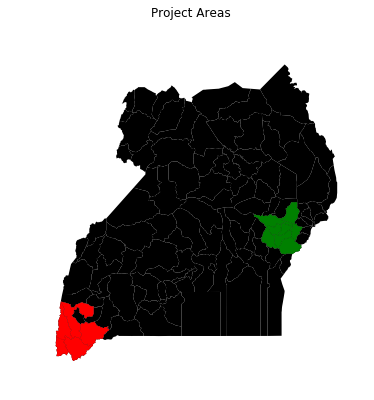

In [35]:
# Creating a map that plots the UNDP project areas on a district map
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
districts.plot(facecolor='black', linewidth=0.025, ax=ax)
# southwest
districts_sw.plot(alpha=1, facecolor='red', linewidth=0, ax=ax)
#eastern
eastern.plot(alpha=1, facecolor='green', linewidth=0, ax=ax)
ax.set_axis_off()
f.suptitle('Project Areas')
plt.axis('equal')
plt.show()

In [36]:
# Loading in waterbodies to see where they are in relation to wetlands and project sites
waterbodies = gpd.read_file(data_path +'Ug_Waterbodies/Ug_Waterbodies.shp')

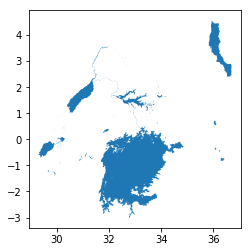

In [37]:
# Plotting the data
waterbodies.plot()

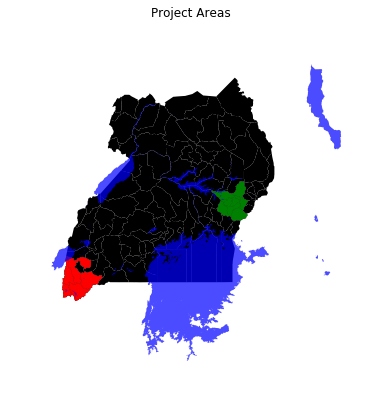

In [38]:
# Plotting the waterbodies on the districts map
# Alpha adjusts the transparency of layers
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
districts.plot(facecolor='black', linewidth=0.025, ax=ax)
# southwest
districts_sw.plot(alpha=1, facecolor='red', linewidth=0, ax=ax)
#eastern
eastern.plot(alpha=1, facecolor='green', linewidth=0, ax=ax)
waterbodies.plot(alpha =0.7, facecolor = 'blue', ax=ax)
ax.set_axis_off()
f.suptitle('Project Areas')
plt.axis('equal')
plt.show()

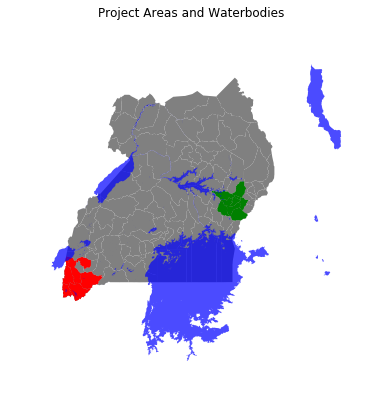

In [39]:
# Changing the color of the plot
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
districts.plot(facecolor='grey', linewidth=0.025, ax=ax)
# southwest
districts_sw.plot(alpha=1, facecolor='red', linewidth=0, ax=ax)
#eastern
eastern.plot(alpha=1, facecolor='green', linewidth=0, ax=ax)
waterbodies.plot(alpha =0.7, facecolor = 'blue', ax=ax)
ax.set_axis_off()
f.suptitle('Project Areas and Waterbodies')
plt.axis('equal')
plt.show()

### Test:
Can you create the same map but color the districts as green and make the edges black? 

In [40]:
#Examining other ways to plot the data - here I am making a regions variable and disolving the districts to that level
#By the output you can see that there are 4 regions
cols = ['SUBREGION', 'REGION', 'geometry']
regions = districts[cols].dissolve(by='REGION', aggfunc='first', as_index=False)
len(regions)

4

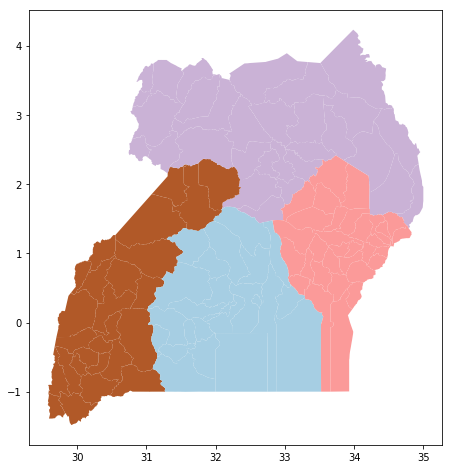

In [41]:
# This is plotting the area by region, but not using the new dissolved region variable
districts.plot(column='REGION', cmap='Paired', categorical=True, figsize=(14, 8));

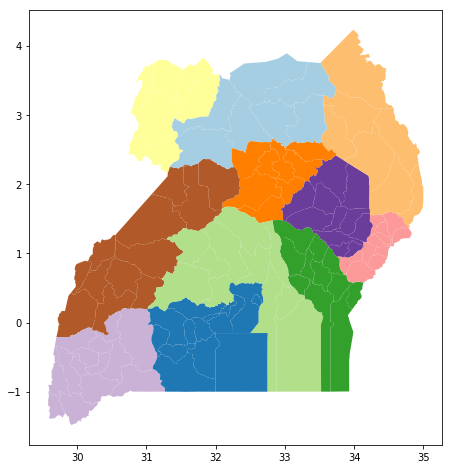

In [42]:
# This is plotting the data by subregion
districts.plot(column='SUBREGION', cmap='Paired', categorical=True, figsize=(14, 8));

In [43]:
# This is similar to the location command but is just asking what districts meet the criteria
districts.query('REGION == "EASTERN REGION"')

,OBJECTID,SUBREGION,REGION,HH2014,HHSIZE2014,MALES2014,FEMALE2014,POP_2014,POP_URBAN,POP_RURAL,...,F1969_2014,TotCon2011,ACCS_ELE_H,STATUS,GlobalID,CreationDa,Creator,EditDate,Editor,geometry
DNAME2014,,,,,,,,,,,,,,,,,,,,,
AMURIA,7,TESO,EASTERN REGION,48402,5.487614,131533,139068,270601,7066,263535,...,2.21,0.000000,0.000000,Electrified,8544f5e1-ac34-45b5-9e8b-b614c2d6e736,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((33.7335661566546 2.41621934573676, 3..."
BUDAKA,11,TESO,EASTERN REGION,37247,5.600164,100196,108243,208439,23834,184605,...,3.20,609.279422,1.689702,Electrified,f641e293-5ec6-44bf-8641-3b43f404091f,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((33.9745135128531 1.18976997680469, 3..."
BUDUDA,12,ELGON,EASTERN REGION,37028,5.053942,105938,105745,211683,6730,204953,...,3.10,184.993267,0.568825,Electrified,fc0b9f7c-7786-46a5-aa30-2dfb253b41d0,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.5345589222934 1.10512296622223, 3..."
BUGIRI,13,EAST CENTRAL,EASTERN REGION,76858,5.042664,186713,198751,390076,29013,361063,...,3.45,742.470908,1.052812,Electrified,daa3eb3e-654e-4acf-9ac7-2cf9d28940d2,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"(POLYGON ((33.6154201985095 0.454442379513343,..."
BUKEDEA,16,TESO,EASTERN REGION,33058,5.850262,90796,98122,188918,6269,182649,...,2.42,240.130403,0.742404,Electrified,864215a4-377d-4d60-b5c9-fca45487d0fa,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.2295072646006 1.57933497190371, 3..."
BUKWO,18,ELGON,EASTERN REGION,16599,5.393016,44770,44483,90139,7686,82453,...,3.64,0.000000,0.000000,Under Construction,86e08114-eab6-4778-93ad-633c77f24d03,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.7581129075179 1.40945870415923, 3..."
BULAMBULI,19,ELGON,EASTERN REGION,33992,5.425560,85837,91485,177322,16167,161155,...,3.00,155.974043,0.606948,Electrified,f008c1d5-ad3e-48e8-a1d9-02871902f6e7,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.3489093181429 1.56723075862713, 3..."
BUSIA,23,EAST CENTRAL,EASTERN REGION,65487,4.606988,156308,169219,325527,55958,269569,...,2.85,1443.114942,2.427696,Electrified,fe0ff62a-12c2-43a9-9de6-a2b49eb5f032,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.0687279889099 0.5923805845944971,..."
BUTALEJA,24,ELGON,EASTERN REGION,44311,5.554192,119068,126805,245873,36249,209624,...,3.11,357.446249,0.859116,Electrified,756e65c2-6cd6-43e8-ab7a-155c02c851a7,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.0802517785972 1.04045513476829, 3..."


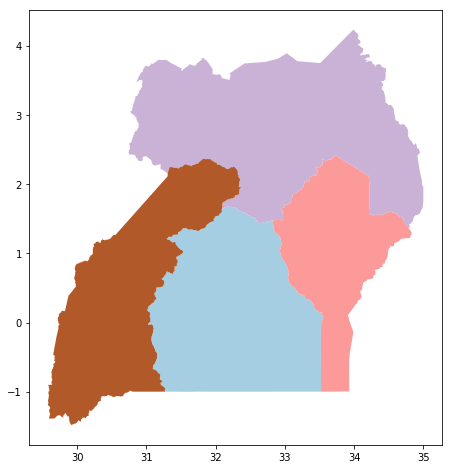

In [44]:
# Here I am using the dissolved regions variable that I created earlier to create a cleaner map
# Notice how these are the same regions but without subdivisions
regions.plot(column='REGION', cmap='Paired', categorical=True, figsize=(14, 8));

### Test: 
Can you make a map of Uganda that maps all the subregions without any district level divisions?

In [45]:
# Now I am adding the Ramsar sites (point data)
ramsar_centroids = gpd.read_file('Uganda/Ramsar/features_centroid_published/features_centroid_publishedPoint.shp')

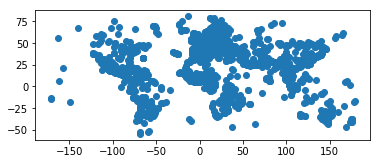

In [46]:
# Plotting these you see we have a problem - the ramsar sites are for the whole world
ramsar_centroids.plot()

## Goal:
Combine the Ramsar sites with the Uganda shapefiles to make a map that shows the Ramsar sites (wetlands of international importance) that are in Uganda

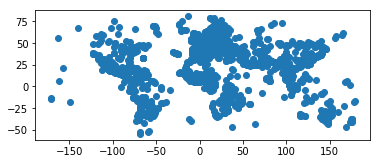

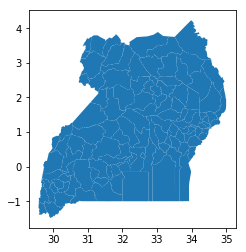

In [47]:
# This will trigger an error
# You see that the plots are created separately
ramsar_centroids.plot()
districts.plot()

In [48]:
# This is how you create a spatial join to include only the ramsar sites in Uganda
ramsar_ug = gpd.tools.sjoin(ramsar_centroids, regions, how="inner")
# There are 12 Ugandan Ramsar sites
len(ramsar_ug)

12

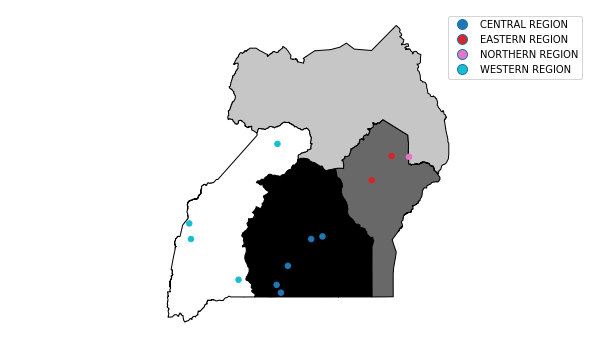

In [49]:
# Plotting the Ramsar sites by region
f, ax = plt.subplots(1, figsize=(10, 6))
ax.set_axis_off()
plt.axis('equal')
regions.plot(ax=ax, cmap='Greys_r', linewidth=1, edgecolor = 'black')
ramsar_ug.plot(column='REGION', markersize=30, 
                               categorical=True, legend=True, ax=ax);

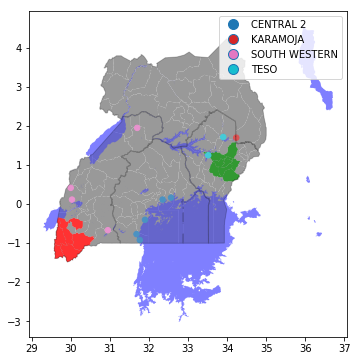

In [50]:
#Adding the project areas and waterbodies to the same map
f, ax = plt.subplots(1, figsize=(6, 6))
# Set Axes to equal (otherwise plot looks weird)
ax.set_aspect('equal')
districts.plot(ax=ax, facecolor='grey', linewidth=1)
waterbodies.plot(ax=ax, facecolor = 'blue', alpha = 0.5)
districts_sw.plot(alpha=1, facecolor='red', linewidth=0, ax=ax)
#eastern
eastern.plot(alpha=1, facecolor='green', linewidth=0, ax=ax)
ramsar_ug.plot(column='SUBREGION', markersize=30, 
                               categorical=True, legend=True, ax=ax)
regions.plot(ax=ax, color = 'white', alpha = '0.2', edgecolor='black', linewidth=1)

In [51]:
#Adding in full watersheds to get a full view of wetlands in the country
uganda_wetlands2008 = gpd.read_file('Uganda/ugandawetlands2008/ugandawetlands2008.shp')

In [52]:
#Looking at the file
uganda_wetlands2008.head()

,OBJECTID,FID_Wetlan,Watershed,PERIMETER,CLASS,Code_quali,Class_Name,Descriptio,LCCS_Code,Life_form,...,FID_Distri,DSTATS,D_06_ID,VOTE_06_ID,Region,District,Shape_Leng,Shape_Area,Gen_Class,geometry
0,1,109,Victoria Nile,945993.0,8a,a,Papyrus,Swamps with Papyrus as dominant species,A24,Herbaceous,...,-1,0,0,0,,,25057.610567,1880.893717,Papyrus and sedges,(POLYGON ((302659.5490754057 134638.4135460918...
1,2,308,Victoria Nile,10434.0,7s,"P,S,I",Grassland,"Rangelands, pasturelands, open savannah may in...",A24,Herbaceous,...,-1,0,0,0,,,703.210189,2506.232995,Grassland,"POLYGON ((331972.6856310755 108586.8413057939,..."
2,3,310,Victoria Nile,143866.0,5s,S,Swamp forest,Thick closed canopy forests and woodlands,A24,Woody vegetation,...,-1,0,0,0,,,36837.738117,6416.379085,Woodland,"(POLYGON ((311008.85271479 132604.8522923728, ..."
3,14,743,Lake Edward,10998.0,8a,a,Papyrus,Swamps with Papyrus as dominant species,A24,Herbaceous,...,-1,0,0,0,,,525.065919,8147.030264,Papyrus and sedges,(POLYGON ((152851.9352585815 -150310.377093909...
4,49,2111,Lake Albert,1150.0,8a,a,Papyrus,Swamps with Papyrus as dominant species,A24,Herbaceous,...,-1,0,0,0,,,560.274845,7497.316905,Papyrus and sedges,(POLYGON ((185570.7128769425 104732.5702164191...


### Issues with Projection
Just like in ArcGIS, each geospatial layer is based on a projection that has transformed information from the spherical Earth to an XY plane. There are a variety of ways you can chose to project your data which come with their own advantages and tradeoffs depending on the goal of your project, but for our purposes we just want to demonstrate that when two layers are in different projections it can trigger errors. Luckily, there are ways to fix this issue.

* Advanced mapmakers may be very interested in the exact features of a coastline or proportional size of different regions, both of which are sensitive to how you project

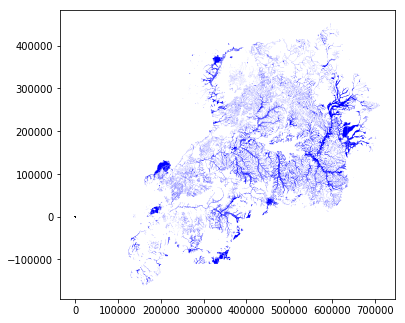

In [60]:
# Notice how we plot the districts and wetlands layer on the same axis (ax=ax) so we should be able to see both layers
f, ax = plt.subplots(1, figsize=(6, 6))
# Set Axes to equal (otherwise plot looks weird)
ax.set_aspect('equal')

regions.plot(alpha = 1, ax=ax, edgecolor = 'black')
uganda_wetlands2008.plot(alpha =1, facecolor = 'blue', ax=ax)

*__Instead of seeing both layers like in our earlier maps, you only see the wetlands__*

In [53]:
# Let's check the projection of the districts layer by typing the dataframe dot crs
districts.crs

{'init': 'epsg:4326'}

In [54]:
# Now let's look at the wetland dataframe's projection
uganda_wetlands2008.crs

{'init': 'epsg:32636'}

*The projections are different numbers*

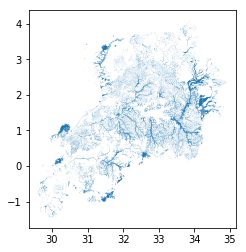

In [55]:
# Now we are testing reprojecting the wetlands by plotting it using a different projection
uganda_wetlands2008.to_crs(epsg=4326).plot()

In [56]:
# We save that reprojection to a new dataframe
ugandawetlands2008_reproject = uganda_wetlands2008.to_crs(epsg=4326)

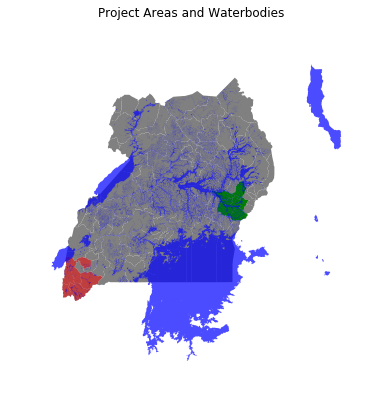

In [57]:
# Now we can plot the layers together!
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
districts.plot(facecolor='grey', alpha = 1, linewidth=0.025, ax=ax)
# southwest
districts_sw.plot(alpha=0.5, facecolor='red', linewidth=0, ax=ax)
#eastern
eastern.plot(alpha=1, facecolor='green', linewidth=0, ax=ax)
ugandawetlands2008_reproject.plot(alpha =0.7, facecolor = 'blue', ax=ax)
waterbodies.plot(alpha =0.7, facecolor = 'blue', ax=ax)
ax.set_axis_off()
f.suptitle('Project Areas and Waterbodies')
plt.axis('equal')
plt.show()

# Final Map

Notice how this map has several layers (districts, southwest region, eastern region, waterbodies, watersheds, and ramsar sites), a reprojected layer, a layer of points as well as polygons, and a nice title

### Bonus:

Can you figure out how to add a nice legend, scale, and north arrow?

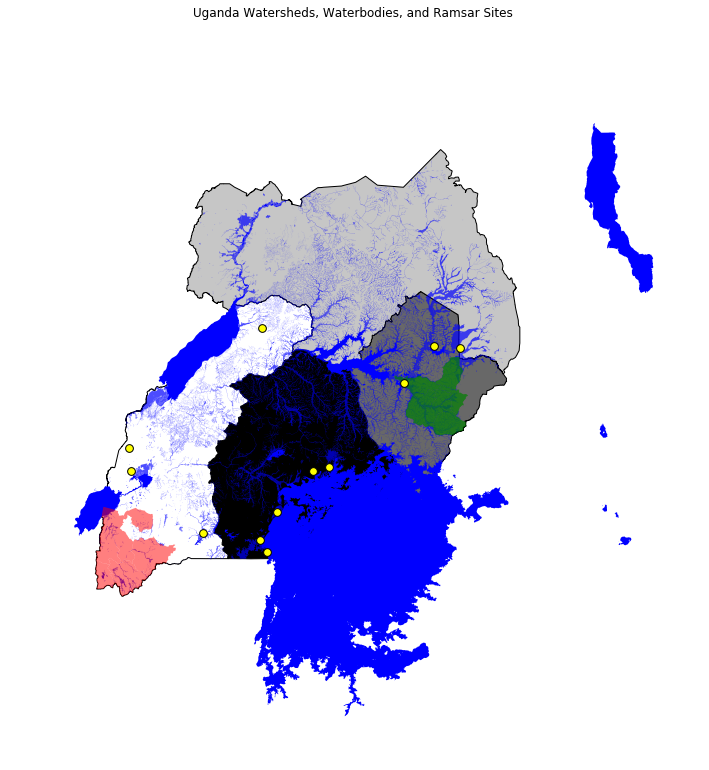

In [59]:
f, ax = plt.subplots(1, figsize=(12, 12))
# Base layer with all the areas for the background
regions.plot(cmap='Greys_r', alpha = 1, linewidth=1, ax=ax, edgecolor = 'black')
ugandawetlands2008_reproject.plot(alpha =0.7, facecolor = 'blue', ax=ax)
waterbodies.plot(alpha =1, facecolor = 'blue', ax=ax)
districts_sw.plot(alpha=0.5, facecolor='red', linewidth=0, ax=ax)
#eastern
eastern.plot(alpha=0.7, facecolor='green', linewidth=0, ax=ax)
ax.set_axis_off()
ramsar_ug.plot(markersize=60, legend=True, ax=ax, color='yellow', edgecolor = 'black');
f.suptitle('Uganda Watersheds, Waterbodies, and Ramsar Sites')
plt.axis('equal')
plt.show()

***

# Acknowledgements

First, we would like to thank **Professor Avery Cohn** for giving us the opportunity and guidance to delve into this material during the semester and build this document during his course on Research in Sustainable Development.

Second, we want to extend our profound gratitude to **Professor Dani Aribas-Bel** whose [online course](http://darribas.org/gds17/syllabus.html) and labs helped guide and direct our thinking. 

Finally, we want to thank our classmates, kind helpers in the Data Lab, and technically-savvy individuals including Dylan Cashman and Kyle Monahan for all the support along the way. 


## Supplementary Resources

Besides the [Liverpool Labs](http://darribas.org/gds17/labs/Lab_00.html) by Professor Arribas-Bel, we also learned from the [Dataquest Data Analyst Course](https://www.dataquest.io/path/data-analyst) and [Code Academy Command Line Tutorial](https://www.codecademy.com/learn/learn-the-command-line)